In [7]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 99

In [8]:
ne17 = pd.read_csv('../Datasets/2017/NEP2017.csv')

In [9]:
ne17

,Week,Result
0,1,L
1,2,W
2,3,W
3,4,L
4,5,W
5,6,W
6,7,W
7,8,W
8,9,NaN
9,10,W


In [10]:
def record_generator(old_df):
    wins = [0]
    losses = [0]
    for i in old_df.Result:
        if i == 'W':
            wins.append(wins[-1] + 1)
            losses.append(losses[-1])
        elif i == 'L':
            wins.append(wins[-1])
            losses.append(losses[-1] + 1)
        else:    
            wins.append(wins[-1])
            losses.append(losses[-1])
    winloss = pd.DataFrame(np.array([wins[1:], losses[1:]]).T, columns = ['W', 'L'])  
    new_df = pd.concat([old_df, winloss], axis=1).set_index("Week")
    return new_df
    

In [11]:
ne17 = record_generator(ne17)

In [12]:
ne17

,Result,W,L
Week,,,
1,L,0,1
2,W,1,1
3,W,2,1
4,L,2,2
5,W,3,2
6,W,4,2
7,W,5,2
8,W,6,2
9,NaN,6,2


In [13]:
# mia17 = record_generator(pd.read_csv('../Datasets/MIA2017.csv'))

# nyj17 = record_generator(pd.read_csv('../Datasets/NYJ2017.csv'))

# pit17 = record_generator(pd.read_csv('../Datasets/PIT2017.csv'))

# bal17 = record_generator(pd.read_csv('../Datasets/BAL2017.csv'))

# cin17 = record_generator(pd.read_csv('../Datasets/CIN2017.csv'))

# cle17 = record_generator(pd.read_csv('../Datasets/CLE2017.csv'))

# jax17 = record_generator(pd.read_csv('../Datasets/JAX2017.csv'))

# ten17 = record_generator(pd.read_csv('../Datasets/TEN2017.csv'))

# hou17 = record_generator(pd.read_csv('../Datasets/HOU2017.csv'))

# ind17 = record_generator(pd.read_csv('../Datasets/IND2017.csv'))

# kcc17 = record_generator(pd.read_csv('../Datasets/KCC2017.csv'))

# lac17 = record_generator(pd.read_csv('../Datasets/LAC2017.csv'))

# oak17 = record_generator(pd.read_csv('../Datasets/OAK2017.csv'))

# den17 = record_generator(pd.read_csv('../Datasets/DEN2017.csv'))

# phi17 = record_generator(pd.read_csv('../Datasets/PHI2017.csv'))

# dal17 = record_generator(pd.read_csv('../Datasets/DAL2017.csv'))

# was17 = record_generator(pd.read_csv('../Datasets/WAS2017.csv'))

# nyg17 = record_generator(pd.read_csv('../Datasets/NYG2017.csv'))

# min17 = record_generator(pd.read_csv('../Datasets/MIN2017.csv'))

# det17 = record_generator(pd.read_csv('../Datasets/DET2017.csv'))

# gbp17 = record_generator(pd.read_csv('../Datasets/GBP2017.csv'))

# chi17 = record_generator(pd.read_csv('../Datasets/CHI2017.csv'))

# nos17 = record_generator(pd.read_csv('../Datasets/NOS2017.csv'))

# car17 = record_generator(pd.read_csv('../Datasets/CAR2017.csv'))

# atl17 = record_generator(pd.read_csv('../Datasets/ATL2017.csv'))

# tbb17 = record_generator(pd.read_csv('../Datasets/TBB2017.csv'))

# lar17 = record_generator(pd.read_csv('../Datasets/LAR2017.csv'))

# sea17 = record_generator(pd.read_csv('../Datasets/SEA2017.csv'))

# ari17 = record_generator(pd.read_csv('../Datasets/ARI2017.csv'))

# sff17 = record_generator(pd.read_csv('../Datasets/SFF2017.csv'))

In [14]:
teams = ['nyj', 'nep', 'mia', 'buf', 'pit', 'bal', 'cle', 'cin', 'ind', 'jax', 'ten', 'hou', 'lac', 'oak', 'kcc', 'den',\
        'nyg', 'phi', 'was', 'dal', 'min', 'gbp', 'det', 'chi', 'tbb', 'atl', 'nos', 'car', 'lar', 'sea', 'ari', 'sff']

In [15]:
# dict_2017 = {}
# for team in teams:
#     season_dict[team] = record_generator(pd.read_csv('../Datasets/{}2017.csv'.format(team.upper())))

In [16]:
seasons = [str(i) for i in range(2002, 2018)]

# The early seasons list was made after I realized I needed more draft data.  
early_seasons = [str(i) for i in range(1990, 2002)]

# More additions
earlier_seasons = [str(i) for i in range(1978, 1990)]

In [17]:
len(teams)

32

In [18]:
full_dict = {}
# full_dict['2017'] = {team: record_generator(pd.read_csv('../Datasets/2017/{}2017.csv'\
#                         .format(team.upper()))) for team in teams}

for season in seasons:
    full_dict[season] = {team: record_generator(pd.read_csv('../Datasets/{}/{}{}.csv'\
                        .format(season, team.upper(), season),names=['Week', 'Result']).fillna('Bye')) for team in teams}

In [19]:
for season in full_dict:
    print len(full_dict[season])

32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32


In [20]:
pd.read_csv('../Datasets/Playoff_Standings/AFC2017.csv')

,Tm,W,L,T,Position,Reason
0,New England Patriots (1),13,3,0,East Champion,head-to-head record
1,Pittsburgh Steelers (2),13,3,0,North Champion,NaN
2,Jacksonville Jaguars (3),10,6,0,South Champion,conference win percentage
3,Kansas City Chiefs (4),10,6,0,West Champion,NaN
4,Tennessee Titans (5),9,7,0,Wild Card #1,conference win percentage
5,Buffalo Bills (6),9,7,0,Wild Card #2,strength of victory
6,Baltimore Ravens,9,7,0,NaN,conference win percentage
7,Los Angeles Chargers,9,7,0,NaN,NaN
8,Cincinnati Bengals,7,9,0,NaN,NaN
9,Oakland Raiders,6,10,0,NaN,head-to-head record


In [21]:
playoff_dict = {}
for season in seasons[1:]:
    playoff_dict[season] = {conference: pd.read_csv('../Datasets/Playoff_Standings/{}{}.csv'.format(conference, season))\
                            for conference in ['AFC', 'NFC']}

# Pro-Football-Reference did not have a tables for the 2002 playoff standings so I had to make them myself. 
playoff_dict['2002'] = {}
playoff_dict['2002']['AFC'] = pd.DataFrame([['OAK', 11, 5, 0, 'West Champion', np.NaN],\
                                           ['TEN', 11, 5, 0, 'South Champion', np.NaN],\
                                           ['PIT', 10, 5, 1, 'North Champion', np.NaN],\
                                           ['NYJ', 9, 7, 0, 'East Champion', np.NaN],\
                                           ['IND', 10, 6, 0, 'Wild Card #1', np.NaN],\
                                           ['CLE', 9, 7, 0, 'Wild Card #2', np.NaN]],\
                                           columns=['Tm', 'W', 'L', 'T', 'Position', 'Reason'])

playoff_dict['2002']['NFC'] = pd.DataFrame([['TBB', 12, 4, 0,  'South Champion', np.NaN],\
                                           ['PHI', 12, 4, 0, 'East Champion', np.NaN],\
                                           ['GBP', 12, 4, 0, 'North Champion', np.NaN],\
                                          ['SFF', 10, 6, 0, 'West Champion', np.NaN],\
                                          ['NYG', 10, 6, 0, 'Wild Card #1', np.NaN],\
                                            ['ATL', 9, 6, 1, 'Wild Card #2', np.NaN]],\
                                          columns=['Tm', 'W', 'L', 'T', 'Position', 'Reason'])

In [22]:
# # With apologies to my former self, previous code goes defunct. 
# playoff_dict['2002'] = {conference: pd.read_excel('../Datasets/Playoff_Standings/{}{}.xlsx'\
#                             .format(conference, '2002'))\
#                             for conference in ['AFC', 'NFC']}

In [23]:
# Added this when I added early seasons. 
for season in early_seasons:
    playoff_dict[season] = {conference: pd.read_excel('../Datasets/Playoff_Standings/{}{}.xlsx'\
                            .format(conference, season))\
                            for conference in ['AFC', 'NFC']}

In [24]:
for season in earlier_seasons:
    playoff_dict[season] = {conference: pd.read_excel('../Datasets/Playoff_Standings/{}{}.xlsx'\
                            .format(conference, season))\
                            for conference in ['AFC', 'NFC']}
    

In [25]:
playoff_dict['1982']['AFC']

,Tm,W,L,T,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS
0,Miami Dolphins*,7,2,0,0.778,198,131,67,7.4,0.8,8.2,2.6,5.6
1,New York Jets+,6,3,0,0.667,245,166,79,8.8,1.7,10.5,8.8,1.7
2,New England Patriots+,5,4,0,0.556,143,157,-14,-1.6,-0.8,-2.4,-3.7,1.3
3,Buffalo Bills,4,5,0,0.444,150,154,-4,-0.4,1.9,1.5,-1.9,3.4
4,Baltimore Colts,0,8,1,0.056,113,236,-123,-13.7,4.8,-8.8,-6.1,-2.7
5,Cincinnati Bengals*,7,2,0,0.778,232,177,55,6.1,-2.5,3.6,3.5,0.2
6,Pittsburgh Steelers+,6,3,0,0.667,204,146,58,6.4,-1.3,5.2,3.4,1.8
7,Cleveland Browns+,4,5,0,0.444,140,182,-42,-4.7,1.2,-3.5,-5.0,1.5
8,Houston Oilers,1,8,0,0.111,136,245,-109,-12.1,1.1,-11.0,-3.9,-7.1
9,Los Angeles Raiders*,8,1,0,0.889,260,200,60,6.7,-1.5,5.2,6.1,-0.9


In [26]:
playoff_dict['2010']['AFC']

,Tm,W,L,T,Position,Reason
0,New England Patriots (1),14,2,0,East Champion,NaN
1,Pittsburgh Steelers (2),12,4,0,North Champion,division win percentage
2,Indianapolis Colts (3),10,6,0,South Champion,head-to-head record
3,Kansas City Chiefs (4),10,6,0,West Champion,NaN
4,Baltimore Ravens (5),12,4,0,Wild Card #1,NaN
5,New York Jets (6),11,5,0,Wild Card #2,NaN
6,San Diego Chargers,9,7,0,NaN,NaN
7,Jacksonville Jaguars,8,8,0,NaN,head-to-head record
8,Oakland Raiders,8,8,0,NaN,NaN
9,Miami Dolphins,7,9,0,NaN,NaN


In [27]:
#By this point I had realized that pd.read_excel was a thing. 
draft_dict = {}
for season in seasons:
    draft_dict[season] = pd.read_excel('../Datasets/Drafts/Draft{}.xlsx'\
                                       .format(season), header=1, skiprows=[2]).set_index('Pick')

# Adding in entries for the early seasons    
for season in early_seasons: 
    draft_dict[season] = pd.read_excel('../Datasets/Drafts/Draft{}.xlsx'\
                                       .format(season), header=1, skiprows=[2]).set_index('Pick')  

# Adding in entries for earlier seasons.     
for season in earlier_seasons:
    draft_dict[season] = pd.read_excel('../Datasets/Drafts/Draft{}.xlsx'\
                                       .format(season), header=1, skiprows=[2]).set_index('Pick') 
    

In [28]:
draft_dict

{'1978':       Rnd   Tm             Player Pos  Age    To
 Pick                                            
 1       1  HOU  Earl Campbell HOF  RB   23  1985
 2       1  KAN          Art Still  DE   22  1989
 3       1  NOR       Wes Chandler  WR   22  1988
 4       1  NYJ         Chris Ward   T   22  1984
 5       1  BUF       Terry Miller  RB   22  1981
 6       1  GNB   James Lofton HOF  WR   22  1993
 7       1  SFO        Ken MacAfee  TE   22  1979
 8       1  CIN       Ross Browner  DE   24  1987
 9       1  SEA      Keith Simpson  DB   22  1985
 10      1  NYG        Gordon King   T   22  1987
 11      1  DET     Luther Bradley  DB   23  1981
 12      1  CLE      Clay Matthews  LB   22  1996
 13      1  ATL          Mike Kenn   T   22  1994
 14      1  SDG     John Jefferson  WR   22  1985
 15      1  STL       Steve Little   K   22  1980
 16      1  CIN         Blair Bush   C   21  1994
 17      1  TAM      Doug Williams  QB   23  1989
 18      1  NWE         Bob Cryder   T   2

In [29]:
counter = 0
for season in full_dict:
    for team in full_dict[season]:
        if full_dict[season][team].shape != (17, 3):
            print season, team
            counter +=1
print counter            

2017 ten
2017 sea
2017 ind
2017 ari
2017 pit
2017 jax
2017 min
2017 mia
2017 cle
2017 oak
2017 nyj
2017 hou
2017 was
2017 nyg
2017 nep
2017 phi
2017 gbp
2017 kcc
2017 dal
2017 lac
2017 sff
2017 tbb
2017 buf
2017 lar
2017 nos
2017 car
2017 atl
2017 det
2017 cin
2017 den
2017 chi
2017 bal
2015 sea
2015 ari
2015 min
2015 gbp
2015 sff
2015 tbb
2015 lar
2015 nos
2015 car
2015 atl
2015 det
2015 chi
2014 ind
2014 pit
2014 jax
2014 mia
2014 cle
2014 oak
2014 nyj
2014 hou
2014 was
2014 nyg
2014 nep
2014 phi
2014 gbp
2014 dal
2014 lac
2014 buf
2014 det
2014 den
2014 bal
63


In [30]:
full_dict['2017']['sea'].drop('Week', axis=0)

,Result,W,L
Week,,,
1,L,0,1
2,W,1,1
3,L,1,2
4,W,2,2
5,W,3,2
6,Bye,3,2
7,W,4,2
8,W,5,2
9,L,5,3


In [31]:
for season in seasons:
    for team in teams:
        try:
            full_dict[season][team].drop('Week', axis=0, inplace=True)
        except:
            pass

In [32]:
counter = 0
for season in full_dict:
    for team in full_dict[season]:
        if full_dict[season][team].shape != (17, 3):
            print season, team
            counter +=1
print counter   

2017 sea
2017 ari
2017 sff
2017 tbb
2017 lar
2015 sea
2015 ari
2015 min
2015 gbp
2015 sff
2015 tbb
2015 lar
2015 nos
2015 car
2015 atl
2015 det
2015 chi
2014 ind
2014 pit
2014 jax
2014 mia
2014 cle
2014 oak
2014 nyj
2014 hou
2014 was
2014 nyg
2014 nep
2014 phi
2014 gbp
2014 dal
2014 lac
2014 buf
2014 det
2014 den
2014 bal
36


In [33]:
full_dict['2017']['sea']

,Result,W,L
Week,,,
1,L,0,1
2,W,1,1
3,L,1,2
4,W,2,2
5,W,3,2
6,Bye,3,2
7,W,4,2
8,W,5,2
9,L,5,3


In [34]:
for season in seasons:
    for team in teams:
        try:
            full_dict[season][team].drop('Bye', axis=0, inplace=True)
        except:
            pass

In [35]:
counter = 0
for season in full_dict:
    for team in full_dict[season]:
        if full_dict[season][team].shape != (17, 3):
            print season, team
            counter +=1
print counter

0


In [36]:
full_dict['2016']['ari']

,Result,W,L
Week,,,
1,L,0,1
2,W,1,1
3,L,1,2
4,L,1,3
5,W,2,3
6,W,3,3
7,T,3,3
8,L,3,4
9,Bye,3,4


In [37]:
type(full_dict['2009']['nyj'].index[0])

numpy.int64

In [38]:
full_dict['2009']['nyg'].index.all() != full_dict['2009']['nyj'].index.all()

False

In [39]:
counter = 0
for season in full_dict:
    for team in full_dict[season]:
        if pd.Series(full_dict[season][team].index).apply(lambda x: str(x)).all() !=\
        pd.Series(full_dict['2009']['nyj'].index).apply(lambda x: str(x)).all():
            print season, team
            counter +=1
print counter

2015 sea
2015 ari
2015 min
2015 gbp
2015 sff
2015 tbb
2015 lar
2015 nos
2015 car
2015 atl
2015 det
2015 chi
2014 ind
2014 pit
2014 jax
2014 mia
2014 cle
2014 oak
2014 nyj
2014 hou
2014 was
2014 nyg
2014 nep
2014 phi
2014 gbp
2014 dal
2014 lac
2014 buf
2014 det
2014 den
2014 bal
31


In [40]:
full_dict['2014']['ten'].Result.all() == 'Bye'

False

In [41]:
counter = 0
for season in full_dict:
    for team in full_dict[season]:
        if full_dict[season][team].Result.all() == 'Bye':
            print season, team
            counter +=1
print counter

0


In [42]:
full_dict['2014']['ten']

,Result,W,L
Week,,,
1,W,1,0
2,L,1,1
3,L,1,2
4,L,1,3
5,L,1,4
6,W,2,4
7,L,2,5
8,L,2,6
9,Bye,2,6


In [43]:
print playoff_dict['2017']['AFC']

                          Tm   W   L  T        Position  \
0   New England Patriots (1)  13   3  0   East Champion   
1    Pittsburgh Steelers (2)  13   3  0  North Champion   
2   Jacksonville Jaguars (3)  10   6  0  South Champion   
3     Kansas City Chiefs (4)  10   6  0   West Champion   
4       Tennessee Titans (5)   9   7  0    Wild Card #1   
5          Buffalo Bills (6)   9   7  0    Wild Card #2   
6           Baltimore Ravens   9   7  0             NaN   
7       Los Angeles Chargers   9   7  0             NaN   
8         Cincinnati Bengals   7   9  0             NaN   
9            Oakland Raiders   6  10  0             NaN   
10            Miami Dolphins   6  10  0             NaN   
11            Denver Broncos   5  11  0             NaN   
12             New York Jets   5  11  0             NaN   
13        Indianapolis Colts   4  12  0             NaN   
14            Houston Texans   4  12  0             NaN   
15          Cleveland Browns   0  16  0             NaN 

In [44]:
draft_dict['2017']['Tm'].sort_values()

Pick
13    ARI
26    ATL
16    BAL
27    BUF
8     CAR
2     CHI
9     CIN
29    CLE
25    CLE
1     CLE
28    DAL
20    DEN
21    DET
12    HOU
15    IND
4     JAX
10    KAN
7     LAC
22    MIA
11    NOR
32    NOR
23    NYG
6     NYJ
24    OAK
14    PHI
30    PIT
31    SFO
3     SFO
19    TAM
18    TEN
5     TEN
17    WAS
Name: Tm, dtype: object

In [45]:
def team_abbreviator(x):
    if x == 'NWE' or 'New England Patriots' in x:
        return 'NEP'
    elif 'New York Jets' in x:
        return 'NYJ'
    elif 'Miami Dolphins' in x:
        return 'MIA'
    elif 'Buffalo Bills' in x:
        return 'BUF'
    elif 'Pittsburgh Steelers' in x:
        return 'PIT'
    elif 'Baltimore Ravens' in x:
        return 'BAL'
    elif 'Bengals' in x:
        return 'CIN'
    elif 'Browns' in x:
        return 'CLE'
    elif 'Colts' in x:
        return 'IND'
    elif 'Titans' in x or 'Oilers' in x:
        return 'TEN'
    elif 'Texans' in x:
        return 'HOU'
    elif 'Jaguars' in x:
        return 'JAX'
    elif 'Broncos' in x:
        return 'DEN'
    elif x == 'KAN' or 'Chiefs' in x:
        return 'KCC'
    elif x=='RAI' or 'Raiders' in x:
        return 'OAK'
    elif x == 'SDG' or 'Chargers' in x:
        return 'LAC'
    elif 'Giants' in x:
        return 'NYG'
    elif 'Eagles' in x:
        return 'PHI'
    elif 'Cowboys' in x:
        return 'DAL'
    elif 'Redskins' in x: 
        return 'WAS'
    elif 'Bears' in x:
        return 'CHI'
    elif 'Vikings' in x:
        return 'MIN'
    elif 'Lions' in x:
        return 'DET'
    elif x == 'GNB' or 'Packers' in x:
        return 'GBP'
    elif x == 'TAM' or 'Buccaneers' in x:
        return 'TBB'
    elif 'Falcons' in x:
        return 'ATL'
    elif x=='NOR' or 'Saints' in x:
        return 'NOS'
    elif 'Panthers' in x:
        return 'CAR'
    elif 'Seahawks' in x:
        return 'SEA'
    elif x == 'SFO' or 'San Francisco' in x:
        return 'SFF'
    elif x=='PHO' or 'Cardinals' in x:
        return 'ARI'
    elif x == 'STL' or x == 'RAM' or 'Rams' in x: # This line presents a problem for the St. Louis Cardinals (1960-1987)
        return 'LAR'
    else:
        return x
    

In [46]:
team_abbreviator('New England Patriots(1)')

'NEP'

In [47]:
playoff_dict['1990']['AFC']

,Tm,W,L,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS
0,Buffalo Bills*,13,3,0.813,428,263,165,10.3,-1.7,8.6,5.7,2.9
1,Miami Dolphins+,12,4,0.750,336,242,94,5.9,-1.2,4.7,0.5,4.2
2,Indianapolis Colts,7,9,0.438,281,353,-72,-4.5,0.6,-3.9,-2.7,-1.2
3,New York Jets,6,10,0.375,295,345,-50,-3.1,-1.5,-4.6,-2.0,-2.6
4,New England Patriots,1,15,0.063,181,446,-265,-16.6,2.0,-14.6,-7.5,-7.1
5,Cincinnati Bengals*,9,7,0.563,360,352,8,0.5,-1.6,-1.1,1.9,-3.0
6,Houston Oilers+,9,7,0.563,405,307,98,6.1,-0.9,5.2,4.9,0.3
7,Pittsburgh Steelers,9,7,0.563,292,240,52,3.3,-1.6,1.6,-3.4,5.0
8,Cleveland Browns,3,13,0.188,228,462,-234,-14.6,1.7,-13.0,-5.2,-7.8
9,Los Angeles Raiders*,12,4,0.750,337,268,69,4.3,2.2,6.6,2.2,4.4


In [48]:
# Accounting for Cleveland '95. 

for season in range(1978, 1996):
    playoff_dict[str(season)]['AFC']['Tm'] = playoff_dict[str(season)]['AFC']['Tm'].apply(lambda x: 'BAL' if 'Cleveland' in x else x)

In [49]:
playoff_dict['1990']['AFC']

,Tm,W,L,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS
0,Buffalo Bills*,13,3,0.813,428,263,165,10.3,-1.7,8.6,5.7,2.9
1,Miami Dolphins+,12,4,0.750,336,242,94,5.9,-1.2,4.7,0.5,4.2
2,Indianapolis Colts,7,9,0.438,281,353,-72,-4.5,0.6,-3.9,-2.7,-1.2
3,New York Jets,6,10,0.375,295,345,-50,-3.1,-1.5,-4.6,-2.0,-2.6
4,New England Patriots,1,15,0.063,181,446,-265,-16.6,2.0,-14.6,-7.5,-7.1
5,Cincinnati Bengals*,9,7,0.563,360,352,8,0.5,-1.6,-1.1,1.9,-3.0
6,Houston Oilers+,9,7,0.563,405,307,98,6.1,-0.9,5.2,4.9,0.3
7,Pittsburgh Steelers,9,7,0.563,292,240,52,3.3,-1.6,1.6,-3.4,5.0
8,BAL,3,13,0.188,228,462,-234,-14.6,1.7,-13.0,-5.2,-7.8
9,Los Angeles Raiders*,12,4,0.750,337,268,69,4.3,2.2,6.6,2.2,4.4


In [50]:
for season in playoff_dict:
    for conference in ['AFC', 'NFC']:
        playoff_dict[season][conference]['Tm'] = playoff_dict[season][conference]['Tm'].apply(team_abbreviator)
        

In [51]:
# for season in early_seasons:
#     for conference in ['AFC', 'NFC']:
#         playoff_dict[season][conference]['Tm'] = playoff_dict[season][conference]['Tm'].apply(team_abbreviator)

In [52]:
# for season in earlier_seasons:
#     for conference in playoff_dict[season]:
#         playoff_dict[season][conference]['Tm'] = playoff_dict[season][conference]['Tm'].apply(team_abbreviator)

In [53]:
playoff_dict['1989']['AFC']

,Tm,W,L,T,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS
0,BUF,9,7,0,0.563,409,317,92,5.8,-1.4,4.3,3.8,0.5
1,IND,8,8,0,0.500,298,301,-3,-0.2,-0.3,-0.5,-2.7,2.2
2,MIA,8,8,0,0.500,331,379,-48,-3.0,-1.8,-4.8,-0.6,-4.2
3,NEP,5,11,0,0.313,297,391,-94,-5.9,-1.2,-7.0,-3.0,-4.0
4,NYJ,4,12,0,0.250,253,411,-158,-9.9,-0.2,-10.1,-4.9,-5.2
5,BAL,9,6,1,0.594,334,254,80,5.0,-0.6,4.4,-0.2,4.6
6,TEN,9,7,0,0.563,365,412,-47,-2.9,0.4,-2.5,2.8,-5.3
7,PIT,9,7,0,0.563,265,326,-61,-3.8,0.1,-3.7,-4.3,0.6
8,CIN,8,8,0,0.500,404,285,119,7.4,-0.5,6.9,4.6,2.4
9,DEN,11,5,0,0.688,362,226,136,8.5,0.8,9.3,3.7,5.7


In [54]:
# Accounting for 'BAL' being the Colts until 1983.

for season in range(1978, 1984):
    draft_dict[str(season)].Tm = draft_dict[str(season)].Tm.apply(lambda x: 'IND' if x == 'BAL' else x)

In [55]:
# Accounting for Cleveland '95. 

for season in range(1978, 1996):
    draft_dict[str(season)].Tm = draft_dict[str(season)].Tm.apply(lambda x: 'BAL' if x == 'CLE' else x)

In [56]:
# Accounting for the Oilers' move to Tennessee after the '96 season. 

for season in range(1978, 1997):
    draft_dict[str(season)].Tm = draft_dict[str(season)].Tm.apply(lambda x: 'TEN' if x == 'HOU' else x)

In [57]:
# Accounting for 'STL' being the St. Louis Cardinals from 1960-1987.

for season in range(1978, 1988):
    draft_dict[str(season)].Tm = draft_dict[str(season)].Tm.apply(lambda x: 'ARI' if x == 'STL' else x)

In [58]:
draft_dict['1979']

,Rnd,Tm,Player,Pos,Age,To
Pick,,,,,,
1,1,BUF,Tom Cousineau,LB,22,1987
2,1,KAN,Mike Bell,DE,22,1991
3,1,CIN,Jack Thompson,QB,23,1984
4,1,CHI,Dan Hampton HOF,DE,22,1990
5,1,BUF,Jerry Butler,WR,21,1986
6,1,IND,Barry Krauss,LB,22,1989
7,1,NYG,Phil Simms,QB,23,1993
8,1,ARI,Ottis Anderson,RB,22,1992
9,1,CHI,Al Harris,DE,22,1990


In [59]:
for season in draft_dict:
    draft_dict[season]['Tm'] = draft_dict[season]['Tm'].apply(team_abbreviator)

In [60]:
draft_dict['1979']

,Rnd,Tm,Player,Pos,Age,To
Pick,,,,,,
1,1,BUF,Tom Cousineau,LB,22,1987
2,1,KCC,Mike Bell,DE,22,1991
3,1,CIN,Jack Thompson,QB,23,1984
4,1,CHI,Dan Hampton HOF,DE,22,1990
5,1,BUF,Jerry Butler,WR,21,1986
6,1,IND,Barry Krauss,LB,22,1989
7,1,NYG,Phil Simms,QB,23,1993
8,1,ARI,Ottis Anderson,RB,22,1992
9,1,CHI,Al Harris,DE,22,1990


In [61]:
playoff_dict['2017']['AFC'].loc[0:5]

,Tm,W,L,T,Position,Reason
0,NEP,13,3,0,East Champion,head-to-head record
1,PIT,13,3,0,North Champion,NaN
2,JAX,10,6,0,South Champion,conference win percentage
3,KCC,10,6,0,West Champion,NaN
4,TEN,9,7,0,Wild Card #1,conference win percentage
5,BUF,9,7,0,Wild Card #2,strength of victory


In [62]:
full_dict['2017']['nyj'].index[0]

'1'

In [63]:
# Updated for early seasons
# and earlier seasons
by_pick_dict = {}
for i in range(1, 33):
    by_pick_dict[i] = {}
    for season in seasons + early_seasons + earlier_seasons:
        try:
            by_pick_dict[i][season] = draft_dict[season].loc[i, 'Tm']
        except:
            pass
        


In [64]:
# Checking for stray indices. Fortunately there are none to be found. 
for season in seasons:
    for team in teams:
        for i in range(16):
            if int(full_dict[season][team].index[i]) != i+1:
                print full_dict[season][team]          

In [65]:
list(full_dict['2017']['nyj'].iloc[7])[1] - list(full_dict['2017']['nyj'].iloc[7])[2]

-2

In [66]:
'NEP' in list(playoff_dict['2017']['AFC'].loc[0:5]['Tm'])

True

In [67]:
# Not usable for early seasons but doesn't matter
def playoff_checker(week, boundary):
    for season in seasons:
        for team in teams: 
            if list(full_dict[season][team].iloc[(week-1)])[1] - list(full_dict[season][team].iloc[(week-1)])[2] <= boundary\
            and (team.upper() in list(playoff_dict[season]['AFC'].loc[0:5]['Tm'])\
            or team.upper() in list(playoff_dict[season]['NFC'].loc[0:5]['Tm'])):
                print team, season, full_dict[season][team].iloc[(week-1)]
                print ''

In [68]:
playoff_checker(12, -2)

lac 2008 Result    L
W         4
L         7
Name: 12, dtype: object

car 2014 Result    Bye
W           3
L           7
Name: 12, dtype: object



In [69]:
tuple(full_dict['2009']['nyj'].iloc[7, 1:])

(4, 4)

In [70]:
# Copying a code snippet from the playoff_checker function to facilitate building more functions. 
# Made a slight syntax improvement with the .locs
# Also not usable for early seasons but doesn't matter

def made_playoffs(season, team):
    if (team.upper() in list(playoff_dict[season]['AFC'].loc[0:5, 'Tm'])\
            or team.upper() in list(playoff_dict[season]['NFC'].loc[0:5, 'Tm'])):
        return True
    return False   

In [71]:
playoff_dict['2006']['AFC']

,Tm,W,L,T,Position,Reason
0,LAC,14,2,0,West Champion,NaN
1,BAL,13,3,0,North Champion,NaN
2,IND,12,4,0,South Champion,head-to-head record
3,NEP,12,4,0,East Champion,NaN
4,NYJ,10,6,0,Wild Card #1,NaN
5,KCC,9,7,0,Wild Card #2,division win percentage
6,DEN,9,7,0,NaN,NaN
7,CIN,8,8,0,NaN,conference win percentage
8,TEN,8,8,0,NaN,strength of victory
9,JAX,8,8,0,NaN,head-to-head record


In [72]:
made_playoffs('2006', 'nep')

True

In [73]:
# Not usable for early seasons but might not matter
def record_tupler(season, team, week):
    return tuple(full_dict[season][team].iloc[(week-1), 1:])

In [74]:
record_tupler('2004', 'min', 17)

(8, 8)

In [75]:
record = (6,10)
min(sum(record,3),17)

17

In [76]:
# Not usable for early seasons but might not matter
def record_playoff_checker(record, print_instances=False):
    counter = 0
    for season in seasons:
        for team in teams:
            for week in range(sum(record), min(sum(record,3), 18)):   #Accounting for a bye week and/or a tie. 
                if record_tupler(season, team, week) == record\
                and made_playoffs(season, team) == True:
                    if print_instances == True:
                        print season, team
                    counter +=1
    return counter

In [77]:
record_playoff_checker((4,6), print_instances=True)

2008 lac
2009 nyj
2012 was
2013 lac
2015 was
2016 gbp


6

In [78]:
record_tupler('2004', 'min', 16)

(8, 7)

In [79]:
for season in seasons:
    for team in teams:
        try:
            print full_dict[season][team].iloc[17]
        except:
            pass

In [80]:
# Not usable for early seasons but doesn't matter

def record_counter(record, print_instances=False):
    counter = 0
    for season in seasons:
        for team in teams:
            for week in range(sum(record), min(sum(record,3), 18)):
                if record_tupler(season, team, week) == record:
                    if print_instances == True:
                        print season, team
                    counter +=1
    return counter                                  

In [81]:
record_counter((14,2), print_instances=True)

2003 nep
2004 nep
2005 ind
2006 lac
2009 ind
2010 nep
2016 nep


7

In [82]:
# Not usable for early seasons but doesn't matter

def playoff_chances(record, verbose=False):
    if verbose==True:
        print "Number of instances: ", record_counter(record)
        print "Times made playoffs: ", record_playoff_checker(record)
        print "Percentage: ", float((record_playoff_checker(record))*100)/record_counter(record), '%'  
    return float((record_playoff_checker(record))*100)/record_counter(record)

In [83]:
playoff_chances((7,0), verbose=True)

Number of instances:  19
Times made playoffs:  19
Percentage:  100.0 %


100.0

In [84]:
super_list = []
for i in range(17):
    sub_list = []
    for j in range(17-i):
        sub_list.append(playoff_chances((i,j)))
    super_list.append(sub_list)
    
pd.DataFrame(super_list).T       

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.000000,50.781250,59.124088,70.930233,82.000000,82.500000,89.655172,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0,100.0,100.0,100.0
1,24.418605,41.434263,52.763819,60.283688,70.114943,79.661017,78.787879,95.652174,100.000000,100.000000,100.000000,100.000000,100.0,100.0,100.0,100.0,NaN
2,12.500000,27.040816,37.096774,46.625767,62.773723,73.394495,81.720430,92.156863,100.000000,100.000000,100.000000,100.000000,100.0,100.0,100.0,NaN,NaN
3,0.000000,11.971831,19.178082,33.561644,48.591549,58.653846,71.287129,81.250000,92.156863,95.918367,100.000000,100.000000,100.0,100.0,NaN,NaN,NaN
4,0.000000,8.571429,10.526316,16.793893,31.578947,44.444444,56.666667,62.962963,77.586207,91.489362,100.000000,100.000000,100.0,NaN,NaN,NaN,NaN
5,0.000000,1.515152,4.347826,11.864407,14.529915,30.864198,46.478873,45.945946,59.459459,80.000000,94.230769,97.560976,NaN,NaN,NaN,NaN,NaN
6,0.000000,0.000000,0.000000,3.614458,5.882353,14.634146,33.333333,36.764706,38.888889,60.377358,83.333333,NaN,NaN,NaN,NaN,NaN,NaN
7,0.000000,0.000000,0.000000,3.225806,1.250000,4.819277,10.714286,21.428571,27.692308,36.363636,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.000000,0.000000,0.000000,2.040816,3.225806,4.225352,8.474576,7.692308,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.960784,1.851852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
playoff_chances_df = pd.DataFrame(super_list)

In [86]:
playoff_chances_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.000000,24.418605,12.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50.781250,41.434263,27.040816,11.971831,8.571429,1.515152,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,59.124088,52.763819,37.096774,19.178082,10.526316,4.347826,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,70.930233,60.283688,46.625767,33.561644,16.793893,11.864407,3.614458,3.225806,2.040816,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,82.000000,70.114943,62.773723,48.591549,31.578947,14.529915,5.882353,1.250000,3.225806,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN
5,82.500000,79.661017,73.394495,58.653846,44.444444,30.864198,14.634146,4.819277,4.225352,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
6,89.655172,78.787879,81.720430,71.287129,56.666667,46.478873,33.333333,10.714286,8.474576,1.960784,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,100.000000,95.652174,92.156863,81.250000,62.962963,45.945946,36.764706,21.428571,7.692308,1.851852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,100.000000,100.000000,100.000000,92.156863,77.586207,59.459459,38.888889,27.692308,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100.000000,100.000000,100.000000,95.918367,91.489362,80.000000,60.377358,36.363636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
# This is the (successful) attempt to do win total separately.
# Updated for early and earlier seasons. 
# Adjusted numbers for 1982 and 1987 seasons where only 9 and 15 games were played respectively. 

def win_total(season, team):
    if season in seasons:
        return full_dict[season][team].iloc[16,1]
    
    
    elif season == '1982':
        for conference in ['AFC', 'NFC']:
            if team.upper() in list(playoff_dict[season][conference].Tm):
                return playoff_dict[season][conference].set_index('Tm').loc[team.upper(), 'W']*(16./9)
            
    elif season == '1987':
        for conference in ['AFC', 'NFC']:
            if team.upper() in list(playoff_dict[season][conference].Tm):
                return playoff_dict[season][conference].set_index('Tm').loc[team.upper(), 'W']*(16./15)
        
        
    elif season in early_seasons + earlier_seasons:
        for conference in ['AFC', 'NFC']:
            if team.upper() in list(playoff_dict[season][conference].Tm):
                return playoff_dict[season][conference].set_index('Tm').loc[team.upper(), 'W']
        
            
    
    
    
    return np.NaN
            

In [88]:
# This works for all seasons (1978-2017).

def win_delta(team, season_0, season_1):
    try:
        return win_total(season_1, team) - win_total(season_0, team)
    except:
        return np.NaN

In [89]:
# Yo dawg, I know you like DataFrames, so I put DataFrames in your DataFrames so you can DataFrame while you DataFrame
pd.DataFrame(full_dict).iloc[3,5].iloc[2,2]

3

In [90]:
# DON'T DELETE THIS CELL. IMPORTANT CODE HERE. 
by_pick_dict[1][by_pick_dict[1].keys()[by_pick_dict[1].keys().index('1978')]]

'TEN'

In [91]:
for season in seasons:
    print season, by_pick_dict[1][by_pick_dict[1].keys()[by_pick_dict[1].keys().index(season)]]

2002 HOU
2003 CIN
2004 LAC
2005 SFF
2006 HOU
2007 OAK
2008 MIA
2009 DET
2010 LAR
2011 CAR
2012 IND
2013 KCC
2014 HOU
2015 TBB
2016 LAR
2017 CLE


In [92]:
by_pick_dict[1].keys()[by_pick_dict[1].keys().index('2002')]

'2002'

In [93]:
playoff_dict['1989']['AFC']

,Tm,W,L,T,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS
0,BUF,9,7,0,0.563,409,317,92,5.8,-1.4,4.3,3.8,0.5
1,IND,8,8,0,0.500,298,301,-3,-0.2,-0.3,-0.5,-2.7,2.2
2,MIA,8,8,0,0.500,331,379,-48,-3.0,-1.8,-4.8,-0.6,-4.2
3,NEP,5,11,0,0.313,297,391,-94,-5.9,-1.2,-7.0,-3.0,-4.0
4,NYJ,4,12,0,0.250,253,411,-158,-9.9,-0.2,-10.1,-4.9,-5.2
5,BAL,9,6,1,0.594,334,254,80,5.0,-0.6,4.4,-0.2,4.6
6,TEN,9,7,0,0.563,365,412,-47,-2.9,0.4,-2.5,2.8,-5.3
7,PIT,9,7,0,0.563,265,326,-61,-3.8,0.1,-3.7,-4.3,0.6
8,CIN,8,8,0,0.500,404,285,119,7.4,-0.5,6.9,4.6,2.4
9,DEN,11,5,0,0.688,362,226,136,8.5,0.8,9.3,3.7,5.7


In [94]:
by_pick_dict[1]

{'1978': 'TEN',
 '1979': u'BUF',
 '1980': u'DET',
 '1981': 'NOS',
 '1982': 'NEP',
 '1983': 'IND',
 '1984': 'NEP',
 '1985': u'BUF',
 '1986': 'TBB',
 '1987': 'TBB',
 '1988': u'ATL',
 '1989': u'DAL',
 '1990': u'IND',
 '1991': u'DAL',
 '1992': u'IND',
 '1993': 'NEP',
 '1994': u'CIN',
 '1995': u'CIN',
 '1996': u'NYJ',
 '1997': 'LAR',
 '1998': u'IND',
 '1999': u'CLE',
 '2000': u'CLE',
 '2001': u'ATL',
 '2002': u'HOU',
 '2003': u'CIN',
 '2004': 'LAC',
 '2005': 'SFF',
 '2006': u'HOU',
 '2007': u'OAK',
 '2008': u'MIA',
 '2009': u'DET',
 '2010': 'LAR',
 '2011': u'CAR',
 '2012': u'IND',
 '2013': 'KCC',
 '2014': u'HOU',
 '2015': 'TBB',
 '2016': u'LAR',
 '2017': u'CLE'}

In [95]:
for season in seasons[2:7]:
    print season, win_delta('cin', '2003', season)

2004 0
2005 3
2006 0
2007 -1
2008 -4


In [96]:
# Works for 1978-2017
def nth_drafter(season, n):
        return by_pick_dict[n][by_pick_dict[n].keys()[by_pick_dict[n].keys().index(season)]]
    

In [97]:
for season in seasons:
    print str(int(season) + 3)

2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020


In [98]:
# Works for 1979-2017
# Returns the next n win deltas for the team with the given pick in the given season.

def pick_win_delta(season, pick, n):

    team = team_abbreviator(nth_drafter(season, pick)).lower()
    season_0= str(int(season)-1)
    season_1_list=[str(int(season) + i) for i in range(n)]
    #print team
    win_deltas =  []
    for season_1 in season_1_list:
        win_deltas.append (win_delta(team, season_0, season_1))
    return np.array(win_deltas)


In [99]:
pd.DataFrame(np.array([pick_win_delta('2013', i, 5) for i in range(1,32)]).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,9,2,1,6,3,-1,5,0,2,1,2,0,2,5,4,0,0,1,-2,-2,1,-9,-5,0,-5,-3,-10,0,-5,0,0
1,7,1,1,6,7,2,6,-1,-2,-4,2,-1,-2,0,0,3,3,-3,-3,-5,0,-7,-3,0,-3,1,-3,-1,-3,-1,4
2,9,3,-1,3,3,-2,8,0,4,-3,-3,3,4,8,0,2,2,-6,-3,-4,2,-5,1,-3,1,-1,-3,-1,1,0,-4
3,10,1,3,3,5,-4,2,-3,-1,3,-2,8,-1,-1,0,1,3,-9,2,-7,-9,-2,-2,-3,-2,-1,-3,-4,-2,-3,5
4,8,8,-1,9,5,-5,3,4,-1,3,2,2,-1,4,4,3,5,-5,-6,-5,-3,-3,3,-7,3,-4,-8,-8,3,4,1


In [100]:
# Generalizing the 'pick_win_delta' function to all picks for a given season.\
# Improvements are from the season before the draft in question. 
# Works for 1979-2017

def draft_win_deltas(season, n):
    
    draft_order = [team_abbreviator(nth_drafter(season, pick)).lower() for pick in range(1, len(draft_dict[season]))]
    season_0 = str(int(season)-1)
    season_1_list=[str(int(season) + i) for i in range(n+1)]
    win_deltas =  []
    for season_1 in season_1_list:
        win_deltas.append(win_delta(team, season_0, season_1))
    return pd.DataFrame(np.array([pick_win_delta(season, pick, n)\
                        for pick in range(1,len(draft_dict[season]))]).T,\
                        columns=[team_abbreviator(club.upper()) for club in draft_order])

    

In [101]:
# This cell and the next 2 are to make sure all the team names have been rendered 'correctly'.

l = [list(draft_win_deltas(str(season), 1).columns) for season in range(1978, 2018)]

In [102]:
flat_list = [item for sublist in l for item in sublist]

In [103]:
set(flat_list)

{'ARI',
 u'ATL',
 'BAL',
 u'BUF',
 u'CAR',
 u'CHI',
 u'CIN',
 u'CLE',
 u'DAL',
 u'DEN',
 u'DET',
 'GBP',
 u'HOU',
 'IND',
 u'JAX',
 'KCC',
 'LAC',
 'LAR',
 u'MIA',
 u'MIN',
 'NEP',
 'NOS',
 u'NYG',
 u'NYJ',
 u'OAK',
 u'PHI',
 u'PIT',
 u'SEA',
 'SFF',
 'TBB',
 'TEN',
 u'WAS'}

In [104]:
# def pick_win_delta(season, pick, n):

#     team = team_abbreviator(nth_drafter(season, pick)).lower()
#     season_0= str(int(season)-1)
#     season_1_list=[str(int(season) + i) for i in range(n)]
#     #print team
#     win_deltas =  []
#     for season_1 in season_1_list:
#         win_deltas.append (win_delta(team, season_0, season_1))
#     return np.array(win_deltas)



# def draft_win_deltas(season, n):

#     draft_order = [team_abbreviator(nth_drafter(season, pick)).lower() for pick in range(1,33)]
#     season_0 = str(int(season)-1)
#     season_1_list=[str(int(season) + i) for i in range(n+1)]
#     win_deltas =  []
#     for season_1 in season_1_list:
#             win_deltas.append(win_delta(team, season_0, season_1))  
#     return pd.DataFrame(np.array([pick_win_delta(season, pick, n) for pick in range(1,33)]).T, columns=draft_order)

In [105]:
for i in [seasons + early_seasons]:
    print i

['2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001']


In [106]:
# Modified for early seasons
# and earlier seasons

def pick_win_deltas(pick, n):
    array = []
    for season in range(1979, 2018):
        column = []
        for season_1 in [str(season + i) for i in range(n)]:
            column.append(win_delta(nth_drafter(str(season), pick).lower(), str(season - 1), season_1))    
        array.append(column)  
    return pd.DataFrame(np.array(array).T, columns=[nth_drafter(str(season), pick) + str(season) for season in range(1979, 2018)])            

In [107]:
pick_win_deltas(1, 40).mean(axis=1)

0     3.160961
1     4.504938
2     5.753651
3     5.130719
4     5.193939
5     4.416667
6     4.729032
7     4.435556
8     4.112644
9     5.171429
10    5.325926
11    4.800000
12    4.752000
13    4.616667
14    5.860870
15    4.990909
16    5.127273
17    5.419048
18    4.790000
19    5.340000
20    6.200000
21    4.933333
22    5.282353
23    6.112500
24    5.320000
25    5.128571
26    4.061538
27    4.483333
28    4.709091
29    6.280000
30    6.444444
31    5.750000
32    6.285714
33    5.833333
34    6.400000
35    6.500000
36    6.666667
37    4.500000
38    4.000000
39         NaN
dtype: float64

In [108]:
# It's time for Time Series
# You can use record as the auto-correlative feature and draft pick as an exogenous feature. 
# If you use linear regression, use previous 3 or 4 years' picks as features.

# Make a dataframe where each row is a season-team who had, say, the first pick. 
# (You will probably have to make a separate dataframe for each pick or *gulp* use a groupby.)
# The columns should be: Previous year's record, draft picks for each of the last 5 years. 
# Targets will be expected win totals for the next 5 years. 
# This will be used for a linear regression(for now). 

In [109]:
by_pick_df = pd.DataFrame(by_pick_dict)
by_pick_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
1978,TEN,KCC,NOS,NYJ,BUF,GBP,SFF,CIN,SEA,NYG,DET,BAL,ATL,LAC,ARI,CIN,TBB,NEP,ARI,LAR,MIN,PIT,BAL,SFF,IND,GBP,DEN,DAL,NaN,NaN,NaN,NaN
1979,BUF,KCC,CIN,CHI,BUF,IND,NYG,ARI,CHI,DET,NOS,CIN,LAC,NYJ,GBP,MIN,ATL,SEA,LAR,BAL,PHI,DEN,KCC,MIA,NEP,LAR,DAL,PIT,NaN,NaN,NaN,NaN
1980,DET,NYJ,CIN,GBP,IND,ARI,ATL,NYG,MIN,SEA,KCC,NOS,SFF,NEP,OAK,BUF,LAR,WAS,CHI,SFF,MIA,TBB,PHI,IND,NEP,GBP,BAL,PIT,NaN,NaN,NaN,NaN
1981,NOS,NYG,NYJ,SEA,ARI,GBP,TBB,SFF,LAR,CIN,CHI,IND,MIA,KCC,DEN,DET,PIT,IND,NEP,WAS,OAK,BAL,OAK,LAC,ATL,DAL,PHI,BUF,NaN,NaN,NaN,NaN
1982,NEP,IND,BAL,IND,CHI,SEA,MIN,TEN,ATL,OAK,KCC,PIT,NOS,LAR,DET,ARI,TBB,NYG,BUF,PHI,DEN,GBP,NYJ,MIA,DAL,CIN,NEP,NaN,NaN,NaN,NaN,NaN
1983,IND,LAR,SEA,DEN,LAC,CHI,KCC,PHI,TEN,NYG,GBP,BUF,DET,BUF,NEP,ATL,ARI,CHI,MIN,LAC,PIT,LAC,DAL,NYJ,CIN,OAK,MIA,WAS,NaN,NaN,NaN,NaN
1984,NEP,TEN,NYG,PHI,KCC,LAC,CIN,IND,ATL,NYJ,CHI,GBP,MIN,MIA,NYJ,CIN,ARI,BAL,IND,DET,KCC,SEA,PIT,SFF,DAL,BUF,NYG,CIN,NaN,NaN,NaN,NaN
1985,BUF,ATL,TEN,MIN,IND,DET,GBP,TBB,PHI,NYJ,TEN,LAC,CIN,BUF,KCC,SFF,DAL,ARI,NYG,PIT,LAR,CHI,OAK,NOS,CIN,DEN,MIA,NEP,NaN,NaN,NaN,NaN
1986,TBB,ATL,TEN,IND,ARI,NOS,KCC,LAC,PIT,PHI,CIN,DET,LAC,MIN,SEA,BUF,ATL,DAL,NYG,BUF,CIN,NYJ,LAR,OAK,TBB,NEP,CHI,NaN,NaN,NaN,NaN,NaN
1987,TBB,IND,TEN,GBP,BAL,ARI,DET,BUF,PHI,PIT,NOS,DAL,ATL,MIN,OAK,MIA,CIN,SEA,KCC,TEN,NYJ,SFF,NEP,LAC,SFF,CHI,DEN,NYG,NaN,NaN,NaN,NaN


In [110]:
all_seasons = earlier_seasons + early_seasons + seasons

In [111]:
# This is the column for previous win totals. 
dummy_list = []
for i in range(1,33):
    for season in all_seasons:
        try:
            dummy_list.append(win_total(str(int(season)-1), by_pick_df.loc[season, i].lower()))
        except:
            dummy_list.append(np.NaN)
            

In [112]:
# Allows 'pick' to be a column instead of the index. 
reset_draft_dict = {}
for season in draft_dict:
    reset_draft_dict[season] = draft_dict[season].reset_index()

In [113]:
# This is the dataframe for previous 5 draft picks. 
full_list = []
for i in range(1,6):
    prev_pick_list = []
    for j in range(1,33):
        for season in all_seasons:
            try:
                prev_pick_list.append(reset_draft_dict[str(int(season)-i)]\
                            [reset_draft_dict[str(int(season)-i)]['Tm'] == draft_dict[season].loc[j, 'Tm']]['Pick'].values[0])
            except:
                prev_pick_list.append(np.NaN)
    full_list.append(prev_pick_list)
    
past_picks_df = pd.DataFrame(np.array(full_list).T, columns=['1_yr_prev', '2_yrs_prev', '3_yrs_prev', '4_yrs_prev', '5_yrs_prev'])

In [114]:
past_picks_df['prev_win_tot'] = dummy_list

In [115]:
future_list = []
for i in range(5):
    next_list=[]
    for j in range(1,33):
        for season in all_seasons:
            try:
                next_list.append(win_total(str(int(season)+i), by_pick_df.loc[season, j].lower()))
            except:
                next_list.append(np.NaN)
    future_list.append(next_list)

future_df = pd.DataFrame(np.array(future_list).T, columns=['yr_0_wins', 'yr_1_wins', 'yr_2_wins', 'yr_3_wins', 'yr_4_wins'])

In [116]:
past_picks_df.shape

(1280, 6)

In [117]:
future_df.shape

(1280, 5)

In [118]:
full_df = pd.concat([past_picks_df, future_df], axis=1)

In [119]:
year_column_list = []
for _ in range(1,33):
    for season in all_seasons:
        year_column_list.append(season)
        

full_df['Year'] = year_column_list

In [120]:
pick_column_list = []
for i in range(1,33):
    for season in all_seasons:
        pick_column_list.append(i)


full_df['Pick'] = pick_column_list

In [121]:
team_column_list = []
for i in range(1,33):
    for season in all_seasons:
        try:
            team_column_list.append(by_pick_dict[i][season])
        except:
            team_column_list.append(np.NaN)


full_df['Tm'] = team_column_list

In [122]:
full_df = full_df[['Pick', 'Year', 'Tm', '5_yrs_prev', '4_yrs_prev', '3_yrs_prev', '2_yrs_prev', '1_yr_prev',\
         'prev_win_tot', 'yr_0_wins', 'yr_1_wins', 'yr_2_wins', 'yr_3_wins', 'yr_4_wins']]

In [123]:
for i in ['5_yrs_prev', '4_yrs_prev', '3_yrs_prev', '2_yrs_prev', '1_yr_prev']:
    full_df[i] = full_df[i].fillna(99)

In [124]:
full_df = full_df.set_index(['Pick', 'Year'])

In [125]:
full_df

Tm  5_yrs_prev  4_yrs_prev  3_yrs_prev  2_yrs_prev  1_yr_prev  \
Pick Year                                                                   
1    1978  TEN        99.0        99.0        99.0        99.0       99.0   
     1979  BUF        99.0        99.0        99.0        99.0        5.0   
     1980  DET        99.0        99.0        99.0        11.0       10.0   
     1981  NOS        99.0        99.0         3.0        11.0       12.0   
     1982  NEP        99.0        18.0        25.0        14.0       19.0   
     1983  IND        25.0         6.0         5.0        12.0        2.0   
     1984  NEP        25.0        14.0        19.0         1.0       15.0   
     1985  BUF        16.0        28.0        19.0        12.0       26.0   
     1986  TBB         7.0        17.0        99.0        99.0        8.0   
     1987  TBB        17.0        99.0        99.0         8.0        1.0   
     1988  ATL        16.0         9.0         2.0         2.0       13.0   
     1989  DAL        25.0        17.0        18.0        12.0       11.0   
     1990  IND         5.0         4.0         2.0        99.0       22.0   
     1991  DAL        18.0        12.0        11.0         1.0       17.0   
     1992  IND         2.0        99.0        22.0         1.0       99.0   
     1993  NEP        17.0        16.0         8.0        11.0       13.0   
     1994  CIN        99.0        12.0        18.0         6.0        5.0   
     1995  CIN        12.0        18.0         6.0         5.0        1.0   
     1996  NYJ        99.0        15.0         4.0        12.0        9.0   
     1997  LAR         3.0        10.0        15.0         6.0        6.0   
     1998  IND        16.0         2.0        15.0        19.0       19.0   
     1999  CLE        99.0        99.0        99.0        99.0       99.0   
     2000  CLE        99.0        99.0        99.0        99.0        1.0   
     2001  ATL        99.0        11.0        12.0        30.0       99.0   
     2002  HOU        99.0        99.0        99.0        99.0       99.0   
     2003  CIN        13.0         3.0         4.0         4.0       10.0   
     2004  LAC        99.0        99.0         5.0         5.0       30.0   
     2005  SFF        16.0         7.0        27.0        26.0       31.0   
     2006  HOU        99.0         1.0         3.0        10.0       16.0   
     2007  OAK        17.0        31.0         2.0        23.0        7.0   
...        ...         ...         ...         ...         ...        ...   
32   1988  NaN        99.0        99.0        99.0        99.0       99.0   
     1989  NaN        99.0        99.0        99.0        99.0       99.0   
     1990  NaN        99.0        99.0        99.0        99.0       99.0   
     1991  NaN        99.0        99.0        99.0        99.0       99.0   
     1992  NaN        99.0        99.0        99.0        99.0       99.0   
     1993  NaN        99.0        99.0        99.0        99.0       99.0   
     1994  NaN        99.0        99.0        99.0        99.0       99.0   
     1995  GBP        18.0        19.0         5.0        15.0       16.0   
     1996  NaN        99.0        99.0        99.0        99.0       99.0   
     1997  NaN        99.0        99.0        99.0        99.0       99.0   
     1998  NaN        99.0        99.0        99.0        99.0       99.0   
     1999  NaN        99.0        99.0        99.0        99.0       99.0   
     2000  NaN        99.0        99.0        99.0        99.0       99.0   
     2001  NaN        99.0        99.0        99.0        99.0       99.0   
     2002  WAS        17.0        99.0         7.0         2.0       15.0   
     2003  OAK         4.0        18.0        17.0        28.0       17.0   
     2004  NEP        17.0        99.0         6.0        21.0       13.0   
     2005  NEP        99.0         6.0        21.0        13.0       21.0   
     2006  NYG        22.0        14.0        25.0         4.0       99.0   
     200

In [126]:

full_exp_list = []
for pick in range(1,33):
    exp_list = []
    for season in [str(i) for i in range(1978, 2014)]:
        list_season = []
        for j in ['yr_0_wins', 'yr_1_wins', 'yr_2_wins', 'yr_3_wins', 'yr_4_wins']:
            try:
                list_season.append(playoff_chances_df.iloc[(int(round(full_df.loc[(pick, season), j])),\
                                                16 - int(round(full_df.loc[(pick,season), j])))])
                
#                 list_season.append(playoff_chances((int(round(full_df.loc[(pick, season), j])),\
#                                                 16 - int(round(full_df.loc[(pick,season), j])))))
            except:
                list_season.append(np.NaN)
        
        exp = sum(pd.Series(list_season).dropna())/100.
        exp_list.append(exp)

    while len(exp_list)<40:
        exp_list.append(np.NaN)

    full_exp_list.append(exp_list)

    full_exp_list

full_df['expd(5)'] = [item for exp_list in full_exp_list for item in exp_list]

In [127]:
full_df

Tm  5_yrs_prev  4_yrs_prev  3_yrs_prev  2_yrs_prev  1_yr_prev  \
Pick Year                                                                   
1    1978  TEN        99.0        99.0        99.0        99.0       99.0   
     1979  BUF        99.0        99.0        99.0        99.0        5.0   
     1980  DET        99.0        99.0        99.0        11.0       10.0   
     1981  NOS        99.0        99.0         3.0        11.0       12.0   
     1982  NEP        99.0        18.0        25.0        14.0       19.0   
     1983  IND        25.0         6.0         5.0        12.0        2.0   
     1984  NEP        25.0        14.0        19.0         1.0       15.0   
     1985  BUF        16.0        28.0        19.0        12.0       26.0   
     1986  TBB         7.0        17.0        99.0        99.0        8.0   
     1987  TBB        17.0        99.0        99.0         8.0        1.0   
     1988  ATL        16.0         9.0         2.0         2.0       13.0   
     1989  DAL        25.0        17.0        18.0        12.0       11.0   
     1990  IND         5.0         4.0         2.0        99.0       22.0   
     1991  DAL        18.0        12.0        11.0         1.0       17.0   
     1992  IND         2.0        99.0        22.0         1.0       99.0   
     1993  NEP        17.0        16.0         8.0        11.0       13.0   
     1994  CIN        99.0        12.0        18.0         6.0        5.0   
     1995  CIN        12.0        18.0         6.0         5.0        1.0   
     1996  NYJ        99.0        15.0         4.0        12.0        9.0   
     1997  LAR         3.0        10.0        15.0         6.0        6.0   
     1998  IND        16.0         2.0        15.0        19.0       19.0   
     1999  CLE        99.0        99.0        99.0        99.0       99.0   
     2000  CLE        99.0        99.0        99.0        99.0        1.0   
     2001  ATL        99.0        11.0        12.0        30.0       99.0   
     2002  HOU        99.0        99.0        99.0        99.0       99.0   
     2003  CIN        13.0         3.0         4.0         4.0       10.0   
     2004  LAC        99.0        99.0         5.0         5.0       30.0   
     2005  SFF        16.0         7.0        27.0        26.0       31.0   
     2006  HOU        99.0         1.0         3.0        10.0       16.0   
     2007  OAK        17.0        31.0         2.0        23.0        7.0   
...        ...         ...         ...         ...         ...        ...   
32   1988  NaN        99.0        99.0        99.0        99.0       99.0   
     1989  NaN        99.0        99.0        99.0        99.0       99.0   
     1990  NaN        99.0        99.0        99.0        99.0       99.0   
     1991  NaN        99.0        99.0        99.0        99.0       99.0   
     1992  NaN        99.0        99.0        99.0        99.0       99.0   
     1993  NaN        99.0        99.0        99.0        99.0       99.0   
     1994  NaN        99.0        99.0        99.0        99.0       99.0   
     1995  GBP        18.0        19.0         5.0        15.0       16.0   
     1996  NaN        99.0        99.0        99.0        99.0       99.0   
     1997  NaN        99.0        99.0        99.0        99.0       99.0   
     1998  NaN        99.0        99.0        99.0        99.0       99.0   
     1999  NaN        99.0        99.0        99.0        99.0       99.0   
     2000  NaN        99.0        99.0        99.0        99.0       99.0   
     2001  NaN        99.0        99.0        99.0        99.0       99.0   
     2002  WAS        17.0        99.0         7.0         2.0       15.0   
     2003  OAK         4.0        18.0        17.0        28.0       17.0   
     2004  NEP        17.0        99.0         6.0        21.0       13.0   
     2005  NEP        99.0         6.0        21.0        13.0       21.0   
     2006  NYG        22.0        14.0        25.0         4.0       99.0   
     200

In [128]:
# A useful table. 
for i in range(9):
    print i, playoff_chances((i, 8-i))

0 0.0
1 0.0
2 0.0
3 11.8644067797
4 31.5789473684
5 58.6538461538
6 81.7204301075
7 95.652173913
8 100.0


In [129]:
midseason_playoff_chances = pd.DataFrame([[i for i in range(9)], [playoff_chances((i, 8-i)) for i in range(9)]])

In [130]:
midseason_playoff_chances = midseason_playoff_chances.T
midseason_playoff_chances.rename({0: 'Wins', 1: 'Chances'}, axis=1, inplace=True)

In [131]:
import matplotlib.pyplot as plt
%matplotlib inline

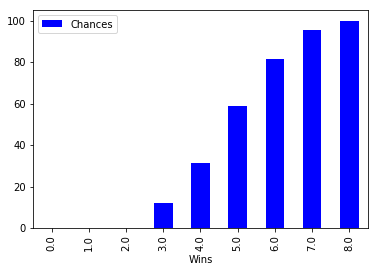

In [132]:
midseason_playoff_chances.plot('Wins', 'Chances', kind='bar', color='b')

In [133]:
# This too. 
for i in range(0, 17):
    print i, playoff_chances((i, 16-i))

0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 1.85185185185
8 10.0
9 36.3636363636
10 83.3333333333
11 97.5609756098
12 100.0
13 100.0
14 100.0
15 100.0
16 100.0


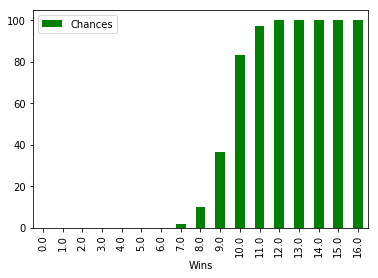

In [134]:
final_playoff_chances = pd.DataFrame([[i for i in range(17)], [playoff_chances((i, 16-i)) for i in range(17)]])

final_playoff_chances = final_playoff_chances.T
final_playoff_chances.rename({0: 'Wins', 1: 'Chances'}, axis=1, inplace=True)

final_playoff_chances.plot('Wins', 'Chances', kind='bar', color='g')

In [135]:
pd.read_excel('../Datasets/Draft_Standings(2002-2017)/AFC2017.xlsx')

,Tm,W,L,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS
0,New England Patriots*,13,3,0.813,458,296,162,10.1,-1.2,8.9,6.3,2.6
1,Buffalo Bills+,9,7,0.563,302,359,-57,-3.6,-0.5,-4.0,-3.0,-1.0
2,Miami Dolphins,6,10,0.375,281,393,-112,-7.0,0.7,-6.3,-3.9,-2.4
3,New York Jets,5,11,0.313,298,382,-84,-5.3,0.3,-4.9,-2.9,-2.1
4,Pittsburgh Steelers*,13,3,0.813,406,308,98,6.1,-1.1,5.0,3.2,1.8
5,Baltimore Ravens,9,7,0.563,395,303,92,5.8,-2.4,3.4,2.2,1.2
6,Cincinnati Bengals,7,9,0.438,290,349,-59,-3.7,-1.3,-5.0,-4.1,-0.9
7,Cleveland Browns,0,16,0.000,234,410,-176,-11.0,0.0,-11.0,-6.8,-4.1
8,Jacksonville Jaguars*,10,6,0.625,417,268,149,9.3,-2.8,6.5,3.0,3.6
9,Tennessee Titans+,9,7,0.563,334,356,-22,-1.4,-2.1,-3.5,-2.0,-1.5


In [136]:
# Initial dictionary of draft standings. Will be adjusted
draft_standings_dict = {}
for season in all_seasons:
    draft_standings_dict[season] = playoff_dict[season]

In [137]:
# This is the first adjustment. There will be another. 
for season in seasons:
    draft_standings_dict[season] = {conference: pd.read_excel('../Datasets/Draft_Standings(2002-2017)/{}{}.xlsx'.format(conference, season))\
                            for conference in ['AFC', 'NFC']}

In [138]:
draft_standings_dict['2002']

{'AFC':                       Tm   W   L  T   W-L%   PF   PA   PD   MoV  SoS   SRS  \
 0         New York Jets*   9   7  0  0.563  359  336   23   1.4  1.7   3.2   
 1   New England Patriots   9   7  0  0.563  381  346   35   2.2  1.8   4.0   
 2         Miami Dolphins   9   7  0  0.563  378  301   77   4.8  1.2   6.1   
 3          Buffalo Bills   8   8  0  0.500  379  397  -18  -1.1  0.9  -0.3   
 4   Pittsburgh Steelers*  10   5  1  0.656  390  345   45   2.8 -0.1   2.7   
 5      Cleveland Browns+   9   7  0  0.563  344  320   24   1.5 -0.3   1.2   
 6       Baltimore Ravens   7   9  0  0.438  316  354  -38  -2.4  0.3  -2.1   
 7     Cincinnati Bengals   2  14  0  0.125  279  456 -177 -11.1  0.6 -10.5   
 8      Tennessee Titans*  11   5  0  0.688  367  324   43   2.7 -0.9   1.8   
 9    Indianapolis Colts+  10   6  0  0.625  349  313   36   2.3 -1.1   1.2   
 10  Jacksonville Jaguars   6  10  0  0.375  328  315   13   0.8 -1.0  -0.2   
 11        Houston Texans   4  12  0  0.250  

In [139]:
# This is the piece de resistance.  
for season in all_seasons:
    draft_standings_dict[season] = pd.concat([draft_standings_dict[season]['AFC'], draft_standings_dict[season]['NFC']], axis=0)\
    .reset_index(drop=True).sort_values(['W', 'SoS']).reset_index(drop=True)

In [140]:
draft_standings_dict['1978']

,Tm,W,L,T,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS
0,SFF,2,14,0,0.125,219,350,-131,-8.2,-0.9,-9.1,-4.6,-4.5
1,CIN,4,12,0,0.250,252,284,-32,-2.0,0.7,-1.3,-2.7,1.3
2,KCC,4,12,0,0.250,243,327,-84,-5.3,0.9,-4.4,-3.0,-1.4
3,TBB,5,11,0,0.313,241,259,-18,-1.1,-2.2,-3.3,-4.1,0.8
4,BUF,5,11,0,0.313,302,354,-52,-3.3,0.0,-3.3,-0.1,-3.2
5,IND,5,11,0,0.313,239,421,-182,-11.4,2.6,-8.8,-2.8,-6.0
6,NYG,6,10,0,0.375,264,298,-34,-2.1,-0.4,-2.5,-1.1,-1.3
7,ARI,6,10,0,0.375,248,296,-48,-3.0,0.5,-2.5,-2.6,0.0
8,DET,7,9,0,0.438,290,300,-10,-0.6,-1.2,-1.8,-0.1,-1.7
9,CHI,7,9,0,0.438,253,274,-21,-1.3,-1.1,-2.4,-2.7,0.3


In [141]:
for season in all_seasons:
    draft_standings_dict[season]['Pick'] = [i+1 for i in range(len(draft_standings_dict[season]))]    

In [142]:
for season in all_seasons:
    draft_standings_dict[season] = draft_standings_dict[season][[u'Pick',  u'Tm',    u'W',    u'L', u'W-L%',   u'PF',   u'PA',   u'PD',  u'MoV',
        u'SoS',  u'SRS', u'OSRS', u'DSRS']]

In [143]:
for season in all_seasons:
    draft_standings_dict[season]['Playoffs'] = draft_standings_dict[season]['Tm'].apply(lambda x: True if ('*' or '+') in x else False)   

In [144]:
draft_standings_dict['2012']

,Pick,Tm,W,L,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS,Playoffs
0,1,Jacksonville Jaguars,2,14,0.125,255,444,-189,-11.8,-1.1,-13.0,-8.1,-4.9,False
1,2,Kansas City Chiefs,2,14,0.125,211,425,-214,-13.4,-0.6,-14.0,-10.3,-3.7,False
2,3,Oakland Raiders,4,12,0.250,290,443,-153,-9.6,-1.3,-10.8,-4.6,-6.2,False
3,4,Philadelphia Eagles,4,12,0.250,280,444,-164,-10.3,1.4,-8.9,-5.3,-3.6,False
4,5,Detroit Lions,4,12,0.250,372,437,-65,-4.1,1.8,-2.3,2.1,-4.4,False
5,6,Cleveland Browns,5,11,0.313,302,368,-66,-4.1,-1.2,-5.3,-4.6,-0.7,False
6,7,Arizona Cardinals,5,11,0.313,250,357,-107,-6.7,3.5,-3.2,-4.8,1.6,False
7,8,Tennessee Titans,6,10,0.375,330,471,-141,-8.8,-1.2,-10.0,-2.6,-7.4,False
8,9,Buffalo Bills,6,10,0.375,344,435,-91,-5.7,-1.0,-6.7,-0.9,-5.8,False
9,10,New York Jets,6,10,0.375,281,375,-94,-5.9,0.0,-5.9,-5.1,-0.9,False


In [145]:
# Making the final adjustment (I may have lied about the piece de resistance earlier).
for season in all_seasons:
    draft_standings_dict[season] = draft_standings_dict[season].sort_values(['Playoffs', 'W', 'SoS'])

In [146]:
draft_standings_dict['2005']

,Pick,Tm,W,L,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS,Playoffs
0,1,Houston Texans,2,14,0.125,260,431,-171,-10.7,0.7,-10.0,-4.4,-5.7,False
1,2,New Orleans Saints,3,13,0.188,235,398,-163,-10.2,-0.9,-11.1,-6.2,-4.9,False
2,3,Green Bay Packers,4,12,0.250,298,344,-46,-2.9,-0.8,-3.7,-1.5,-2.2,False
3,4,Tennessee Titans,4,12,0.250,299,421,-122,-7.6,0.1,-7.6,-2.0,-5.5,False
4,5,San Francisco 49ers,4,12,0.250,239,428,-189,-11.8,0.7,-11.1,-5.6,-5.5,False
5,6,New York Jets,4,12,0.250,240,355,-115,-7.2,0.8,-6.4,-5.2,-1.2,False
6,7,Oakland Raiders,4,12,0.250,290,383,-93,-5.8,3.0,-2.8,-1.2,-1.6,False
7,8,Detroit Lions,5,11,0.313,254,345,-91,-5.7,-1.0,-6.7,-4.3,-2.4,False
8,9,Arizona Cardinals,5,11,0.313,311,387,-76,-4.8,-0.2,-5.0,-2.0,-3.0,False
9,10,Buffalo Bills,5,11,0.313,271,367,-96,-6.0,0.2,-5.8,-4.0,-1.8,False


In [147]:
#########
for i in draft_standings_dict['1982'][draft_standings_dict['1982']['W'] == 2]['Pick'].values:
    print i

3
4


In [148]:
draft_standings_dict['1982']

,Pick,Tm,W,L,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS,Playoffs
0,1,IND,0,8,0.056,113,236,-123,-13.7,4.8,-8.8,-6.1,-2.7,False
1,2,TEN,1,8,0.111,136,245,-109,-12.1,1.1,-11.0,-3.9,-7.1,False
2,3,LAR,2,7,0.222,200,250,-50,-5.6,-1.4,-6.9,0.9,-7.9,False
3,4,DEN,2,7,0.222,148,226,-78,-8.7,-1.1,-9.7,-6.0,-3.8,False
4,5,SFF,3,6,0.333,209,206,3,0.3,-2.8,-2.4,0.3,-2.8,False
5,6,CHI,3,6,0.333,141,174,-33,-3.7,-1.7,-5.4,-4.2,-1.2,False
6,7,KCC,3,6,0.333,176,184,-8,-0.9,0.7,-0.2,-1.9,1.6,False
7,8,PHI,3,6,0.333,191,195,-4,-0.4,1.1,0.7,2.7,-2.0,False
8,9,SEA,4,5,0.444,127,147,-20,-2.2,-3.2,-5.4,-7.5,2.0,False
9,10,NOS,4,5,0.444,129,160,-31,-3.4,-0.3,-3.8,-5.7,1.9,False


In [149]:
super_list = []
for i in range(17):
    dumb_list = []
    for season in all_seasons:
        for value in draft_standings_dict[season][draft_standings_dict[season]['W'] == i]['Pick'].values:
            dumb_list.append(value)
    super_list.append(dumb_list)

In [150]:
super_list

[[1, 1, 1],
 [1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1,
  1,
  2,
  1,
  2,
  3,
  4,
  1,
  2,
  1,
  1,
  2,
  1,
  1,
  2,
  1,
  1,
  2,
  1,
  1,
  1,
  1,
  2,
  3,
  2,
  1,
  1,
  2,
  1,
  2,
  1,
  1,
  2,
  2],
 [5,
  6,
  7,
  8,
  3,
  2,
  3,
  2,
  1,
  1,
  2,
  2,
  2,
  3,
  4,
  1,
  2,
  3,
  1,
  2,
  3,
  1,
  1,
  2,
  3,
  2,
  2,
  3,
  3,
  2,
  2,
  2,
  2,
  3,
  3,
  2,
  3,
  4,
  1,
  2,
  3,
  4,
  2],
 [2,
  3,
  3,
  2,
  3,
  4,
  3,
  9,
  10,
  11,
  12,
  13,
  14,
  4,
  5,
  6,
  3,
  3,
  4,
  5,
  6,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  3,
  5,
  6,
  7,
  3,
  4,
  2,
  3,
  4,
  2,
  3,
  4,
  2,
  3,
  4,
  5,
  4,
  5,
  6,
  3,
  4,
  4,
  5,
  3,
  4,
  1,
  2,
  3,
  4,
  2,
  3,
  3,
  4,
  5,
  6,
  7,
  3,
  4,
  3,
  4,
  5,
  6,
  4,
  5,
  6,
  4,
  5,
  2,
  3,
  4,
  4,
  5,
  3,
  4,
  5,
  3,
  4,
  5,
  6,
  7,
  5,
  6,
  3,
  4,
  5,
  3,
  4],
 [4,
  5,
  6,
  4,
  5,
  6,
  5,
  6,
  7,
  4,
  15,
  16,
  17,
  18,
  19,
  20

In [151]:
np.mean([3,4,5])

4.0

In [152]:
avg_list = []
for dumb_list in super_list:
    avg_list.append(np.mean(dumb_list))
    

In [153]:
draft_pos_by_wins = pd.Series(avg_list, index=[i for i in range(17)])

In [154]:
# Another important Series. 
draft_pos_by_wins

0      1.000000
1      1.090909
2      1.558824
3      2.674419
4      4.421053
5      6.838384
6      9.378378
7     11.903704
8     15.568493
9     18.985612
10    22.325758
11    25.099010
12    27.886076
13    29.717391
14    29.600000
15    30.333333
16    32.000000
dtype: float64

In [155]:
draft_pos_by_wins = pd.DataFrame([[i for i in range(17)], avg_list])

draft_pos_by_wins = draft_pos_by_wins.T
draft_pos_by_wins.rename({0: 'Wins', 1: 'Expected_Pick'}, axis=1, inplace=True)

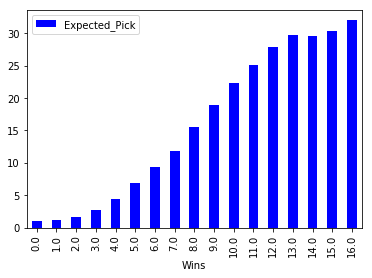

In [156]:
draft_pos_by_wins.plot('Wins', 'Expected_Pick', kind='bar', color='b')

In [157]:
full_df[['yr_0_wins', 'yr_1_wins', 'yr_2_wins', 'yr_3_wins', 'yr_4_wins']].isnull().sum(axis=1)

Pick  Year
1     1978    0
      1979    0
      1980    0
      1981    0
      1982    0
      1983    0
      1984    0
      1985    0
      1986    0
      1987    0
      1988    0
      1989    0
      1990    0
      1991    0
      1992    0
      1993    0
      1994    0
      1995    0
      1996    0
      1997    0
      1998    0
      1999    0
      2000    0
      2001    0
      2002    0
      2003    0
      2004    0
      2005    0
      2006    0
      2007    0
             ..
32    1988    5
      1989    5
      1990    5
      1991    5
      1992    5
      1993    5
      1994    5
      1995    0
      1996    5
      1997    5
      1998    5
      1999    5
      2000    5
      2001    5
      2002    0
      2003    0
      2004    0
      2005    0
      2006    0
      2007    0
      2008    5
      2009    0
      2010    0
      2011    0
      2012    0
      2013    0
      2014    1
      2015    2
      2016    5
      2017    4
Length: 1280,

In [158]:
playoff_chances((int(round(full_df.loc[(1, '2014'), 'yr_0_wins' : 'yr_4_wins'].mean())),\
                16 - int(round(full_df.loc[(1, '2014'), 'yr_0_wins' : 'yr_4_wins'].mean()))))

10.0

In [159]:
playoff_chances((10,6), verbose=True)

Number of instances:  54
Times made playoffs:  45
Percentage:  83.3333333333 %


83.33333333333333

In [160]:
full_df.columns

Index([u'Tm', u'5_yrs_prev', u'4_yrs_prev', u'3_yrs_prev', u'2_yrs_prev',
       u'1_yr_prev', u'prev_win_tot', u'yr_0_wins', u'yr_1_wins', u'yr_2_wins',
       u'yr_3_wins', u'yr_4_wins', u'expd(5)'],
      dtype='object')

In [161]:
full_df = full_df.reset_index()

In [162]:
X = full_df.loc[1:, [u'5_yrs_prev', u'4_yrs_prev', u'3_yrs_prev', u'2_yrs_prev',
       u'1_yr_prev', u'prev_win_tot', 'pick']]

y = full_df.loc[1:, 'expd(5)']

/opt/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
/opt/lib/python2.7/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [163]:
full_df.isnull().sum()

Pick              0
Year              0
Tm               84
5_yrs_prev        0
4_yrs_prev        0
3_yrs_prev        0
2_yrs_prev        0
1_yr_prev         0
prev_win_tot    119
yr_0_wins        84
yr_1_wins       116
yr_2_wins       147
yr_3_wins       179
yr_4_wins       211
expd(5)         128
dtype: int64

In [164]:
full_df[full_df['Tm'].isnull() == True]

,Pick,Year,Tm,5_yrs_prev,4_yrs_prev,3_yrs_prev,2_yrs_prev,1_yr_prev,prev_win_tot,yr_0_wins,yr_1_wins,yr_2_wins,yr_3_wins,yr_4_wins,expd(5)
1012,26,1990,NaN,99.0,99.0,99.0,99.0,99.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1052,27,1990,NaN,99.0,99.0,99.0,99.0,99.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1084,28,1982,NaN,99.0,99.0,99.0,99.0,99.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1088,28,1986,NaN,99.0,99.0,99.0,99.0,99.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1090,28,1988,NaN,99.0,99.0,99.0,99.0,99.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1092,28,1990,NaN,99.0,99.0,99.0,99.0,99.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1093,28,1991,NaN,99.0,99.0,99.0,99.0,99.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1120,29,1978,NaN,99.0,99.0,99.0,99.0,99.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1121,29,1979,NaN,99.0,99.0,99.0,99.0,99.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1122,29,1980,NaN,99.0,99.0,99.0,99.0,99.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [165]:
full_df = full_df.dropna(thresh=9)

In [166]:
full_df.isnull().sum()

Pick              0
Year              0
Tm                0
5_yrs_prev        0
4_yrs_prev        0
3_yrs_prev        0
2_yrs_prev        0
1_yr_prev         0
prev_win_tot     35
yr_0_wins         0
yr_1_wins        32
yr_2_wins        63
yr_3_wins        95
yr_4_wins       127
expd(5)         127
dtype: int64

In [167]:
win_total('1990', 'bal')

3

In [168]:
full_df = full_df[full_df['prev_win_tot'].isnull() == False]

In [169]:
full_df = full_df.dropna()

In [170]:
full_df.shape

(1034, 15)

In [171]:
full_df

,Pick,Year,Tm,5_yrs_prev,4_yrs_prev,3_yrs_prev,2_yrs_prev,1_yr_prev,prev_win_tot,yr_0_wins,yr_1_wins,yr_2_wins,yr_3_wins,yr_4_wins,expd(5)
1,1,1979,BUF,99.0,99.0,99.0,99.0,5.0,5.0,7.000000,11.000000,10.000000,7.111111,8.0,1.945980
2,1,1980,DET,99.0,99.0,99.0,11.0,10.0,2.0,9.000000,8.000000,7.111111,9.000000,4.0,0.845791
3,1,1981,NOS,99.0,99.0,3.0,11.0,12.0,1.0,4.000000,7.111111,8.000000,7.000000,5.0,0.137037
4,1,1982,NEP,99.0,18.0,25.0,14.0,19.0,2.0,8.888889,8.000000,9.000000,11.000000,11.0,2.778492
5,1,1983,IND,25.0,6.0,5.0,12.0,2.0,0.0,7.000000,4.000000,5.000000,3.000000,9.6,0.851852
6,1,1984,NEP,25.0,14.0,19.0,1.0,15.0,8.0,9.000000,11.000000,11.000000,8.533333,9.0,3.042129
7,1,1985,BUF,16.0,28.0,19.0,12.0,26.0,2.0,2.000000,4.000000,7.466667,12.000000,9.0,1.382155
8,1,1986,TBB,7.0,17.0,99.0,99.0,8.0,2.0,2.000000,4.266667,5.000000,5.000000,6.0,0.000000
9,1,1987,TBB,17.0,99.0,99.0,8.0,1.0,2.0,4.266667,5.000000,5.000000,6.000000,3.0,0.000000
10,1,1988,ATL,16.0,9.0,2.0,2.0,13.0,3.2,5.000000,3.000000,5.000000,10.000000,6.0,0.833333


In [172]:
full_df.loc[1275, 'Tm']

u'BAL'

In [173]:
# This makes the train-test-split easier
full_df['Year'] = full_df['Year'].apply(lambda x: int(x))

In [174]:
train_data = full_df[full_df['Year'] < 2002]

In [175]:
test_data =  full_df[full_df['Year'] >= 2002]

In [176]:
X_train = train_data[[u'5_yrs_prev', u'4_yrs_prev', u'3_yrs_prev', u'2_yrs_prev',
       u'1_yr_prev', u'prev_win_tot', 'Pick']]

X_test = test_data[[u'5_yrs_prev', u'4_yrs_prev', u'3_yrs_prev', u'2_yrs_prev',
       u'1_yr_prev', u'prev_win_tot', 'Pick']]

y_train = train_data['expd(5)']
y_test = test_data['expd(5)']

In [177]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.fit_transform(X_test)

In [178]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(Xs_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [179]:
linreg.score(Xs_test, y_test)

0.09061000707521949

In [180]:
linreg.coef_

array([ 0.02896738, -0.0109169 , -0.07273739, -0.02004159,  0.06676191,
        0.22914803,  0.15423653])

In [181]:
Xs_test.shape

(382, 7)

In [182]:
y_pred = linreg.predict(Xs_test)

In [183]:
pd.DataFrame([y_pred, y_test]).T

,0,1
0,1.149846,1.294128
1,1.388432,3.439246
2,1.128139,0.137037
3,1.245038,0.563636
4,1.128111,0.200000
5,1.147114,1.031165
6,1.001537,0.851852
7,1.037563,0.055556
8,1.280876,2.037037
9,1.085385,3.126829


In [184]:
tuple_list = []
for i in range(17):
    tuple_sublist = []
    for j in range(17-i):
        tuple_sublist.append((i,j))
    tuple_list.append(tuple_sublist)
tuple_list

[[(0, 0),
  (0, 1),
  (0, 2),
  (0, 3),
  (0, 4),
  (0, 5),
  (0, 6),
  (0, 7),
  (0, 8),
  (0, 9),
  (0, 10),
  (0, 11),
  (0, 12),
  (0, 13),
  (0, 14),
  (0, 15),
  (0, 16)],
 [(1, 0),
  (1, 1),
  (1, 2),
  (1, 3),
  (1, 4),
  (1, 5),
  (1, 6),
  (1, 7),
  (1, 8),
  (1, 9),
  (1, 10),
  (1, 11),
  (1, 12),
  (1, 13),
  (1, 14),
  (1, 15)],
 [(2, 0),
  (2, 1),
  (2, 2),
  (2, 3),
  (2, 4),
  (2, 5),
  (2, 6),
  (2, 7),
  (2, 8),
  (2, 9),
  (2, 10),
  (2, 11),
  (2, 12),
  (2, 13),
  (2, 14)],
 [(3, 0),
  (3, 1),
  (3, 2),
  (3, 3),
  (3, 4),
  (3, 5),
  (3, 6),
  (3, 7),
  (3, 8),
  (3, 9),
  (3, 10),
  (3, 11),
  (3, 12),
  (3, 13)],
 [(4, 0),
  (4, 1),
  (4, 2),
  (4, 3),
  (4, 4),
  (4, 5),
  (4, 6),
  (4, 7),
  (4, 8),
  (4, 9),
  (4, 10),
  (4, 11),
  (4, 12)],
 [(5, 0),
  (5, 1),
  (5, 2),
  (5, 3),
  (5, 4),
  (5, 5),
  (5, 6),
  (5, 7),
  (5, 8),
  (5, 9),
  (5, 10),
  (5, 11)],
 [(6, 0),
  (6, 1),
  (6, 2),
  (6, 3),
  (6, 4),
  (6, 5),
  (6, 6),
  (6, 7),
  (6, 8),
  (6, 9

In [185]:
playoff_chances_list = [playoff_chances(record) for tuple_sublist in tuple_list for record in tuple_sublist]

In [186]:
len(playoff_chances_list)

153

In [187]:
full_df.set_index(['Pick', 'Year'])

Tm  5_yrs_prev  4_yrs_prev  3_yrs_prev  2_yrs_prev  1_yr_prev  \
Pick Year                                                                   
1    1979  BUF        99.0        99.0        99.0        99.0        5.0   
     1980  DET        99.0        99.0        99.0        11.0       10.0   
     1981  NOS        99.0        99.0         3.0        11.0       12.0   
     1982  NEP        99.0        18.0        25.0        14.0       19.0   
     1983  IND        25.0         6.0         5.0        12.0        2.0   
     1984  NEP        25.0        14.0        19.0         1.0       15.0   
     1985  BUF        16.0        28.0        19.0        12.0       26.0   
     1986  TBB         7.0        17.0        99.0        99.0        8.0   
     1987  TBB        17.0        99.0        99.0         8.0        1.0   
     1988  ATL        16.0         9.0         2.0         2.0       13.0   
     1989  DAL        25.0        17.0        18.0        12.0       11.0   
     1990  IND         5.0         4.0         2.0        99.0       22.0   
     1991  DAL        18.0        12.0        11.0         1.0       17.0   
     1992  IND         2.0        99.0        22.0         1.0       99.0   
     1993  NEP        17.0        16.0         8.0        11.0       13.0   
     1994  CIN        99.0        12.0        18.0         6.0        5.0   
     1995  CIN        12.0        18.0         6.0         5.0        1.0   
     1996  NYJ        99.0        15.0         4.0        12.0        9.0   
     1997  LAR         3.0        10.0        15.0         6.0        6.0   
     1998  IND        16.0         2.0        15.0        19.0       19.0   
     2000  CLE        99.0        99.0        99.0        99.0        1.0   
     2001  ATL        99.0        11.0        12.0        30.0       99.0   
     2003  CIN        13.0         3.0         4.0         4.0       10.0   
     2004  LAC        99.0        99.0         5.0         5.0       30.0   
     2005  SFF        16.0         7.0        27.0        26.0       31.0   
     2006  HOU        99.0         1.0         3.0        10.0       16.0   
     2007  OAK        17.0        31.0         2.0        23.0        7.0   
     2008  MIA        99.0        19.0         2.0        16.0        9.0   
     2009  DET         7.0        10.0         9.0         2.0       17.0   
     2010  LAR        19.0        15.0        13.0         2.0        2.0   
...        ...         ...         ...         ...         ...        ...   
30   2012  SFF        11.0        29.0        10.0        11.0        7.0   
     2013  LAR         2.0         2.0         1.0        14.0       14.0   
31   1995  KCC        13.0        21.0        20.0        99.0       25.0   
     1999  DEN        99.0        99.0        15.0        28.0       30.0   
     2000  LAR         6.0         6.0         1.0         6.0        6.0   
     2001  BAL         4.0         4.0        10.0        10.0        5.0   
     2002  LAR         1.0         6.0         6.0        31.0       12.0   
     2003  OAK         4.0        18.0        17.0        28.0       17.0   
     2004  SFF        24.0        16.0         7.0        27.0       26.0   
     2005  PHI         6.0        25.0        26.0        15.0       16.0   
     2006  SEA         9.0        28.0        11.0        23.0       26.0   
     2007  CHI        29.0        14.0        14.0         4.0       99.0   
     2008  NYG        25.0         4.0        99.0        32.0       20.0   
     2009  ARI         3.0         8.0        10.0         5.0       16.0   
     2010  IND        29.0        30.0        32.0        99.0       27.0   
     2011  PIT        25.0        15.0        23.0        32.0       18.0   
     2012  TBB         4.0        20.0        17.0         3.0       20.0   
     2013  DAL        22.0        99.0        24.0         9.0        6.0   
32   1995  GBP        18.0        19.0         5.0        15.0       16.0   
     200

In [188]:
expd5_by_pick = full_df.groupby('Pick')['expd(5)'].mean()

In [189]:
expd5_by_pick = list(expd5_by_pick.values)

In [190]:
expd5_by_pick = pd.DataFrame([[i for i in range(1,33)], expd5_by_pick])

expd5_by_pick = expd5_by_pick.T
expd5_by_pick.rename({0: 'Pick', 1: 'Expd._Plyfs_5_yrs'}, axis=1, inplace=True)



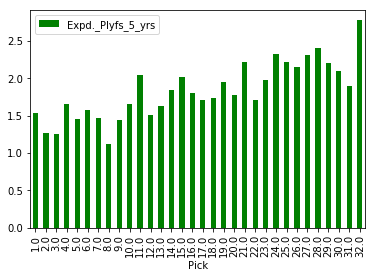

In [191]:
expd5_by_pick.plot('Pick', 'Expd._Plyfs_5_yrs', kind='bar', color='g')

In [192]:
draft_standings_dict

{'1978':     Pick   Tm   W   L   W-L%   PF   PA   PD   MoV  SoS   SRS  OSRS  DSRS  \
 0      1  SFF   2  14  0.125  219  350 -131  -8.2 -0.9  -9.1  -4.6  -4.5   
 1      2  CIN   4  12  0.250  252  284  -32  -2.0  0.7  -1.3  -2.7   1.3   
 2      3  KCC   4  12  0.250  243  327  -84  -5.3  0.9  -4.4  -3.0  -1.4   
 3      4  TBB   5  11  0.313  241  259  -18  -1.1 -2.2  -3.3  -4.1   0.8   
 4      5  BUF   5  11  0.313  302  354  -52  -3.3  0.0  -3.3  -0.1  -3.2   
 5      6  IND   5  11  0.313  239  421 -182 -11.4  2.6  -8.8  -2.8  -6.0   
 6      7  NYG   6  10  0.375  264  298  -34  -2.1 -0.4  -2.5  -1.1  -1.3   
 7      8  ARI   6  10  0.375  248  296  -48  -3.0  0.5  -2.5  -2.6   0.0   
 8      9  DET   7   9  0.438  290  300  -10  -0.6 -1.2  -1.8  -0.1  -1.7   
 9     10  CHI   7   9  0.438  253  274  -21  -1.3 -1.1  -2.4  -2.7   0.3   
 10    11  NOS   7   9  0.438  281  298  -17  -1.1 -0.6  -1.7  -0.5  -1.2   
 11    12  BAL   8   8  0.500  334  356  -22  -1.4 -0.6  -2.0   2.5 

In [193]:
from sklearn.tree import DecisionTreeRegressor

In [194]:
dtr = DecisionTreeRegressor()

In [195]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [196]:
dtr.score(X_test, y_test)

-0.82857442286853489

In [197]:
from sklearn.ensemble import RandomForestRegressor

In [198]:
rfr = RandomForestRegressor(n_estimators=200, max_features=3)

In [199]:
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [200]:
rfr.score(X_test, y_test)

0.028608328103838954

In [201]:
# Now we're going to make a DataFrame to facilitate TimeSeries modeling. 

In [202]:
win_total(team='nyj', season='1978')

8

In [203]:
for season in all_seasons:
    print season,  draft_standings_dict[season][draft_standings_dict[season]['Tm'] == 'NYJ']['Pick'].values[0]

1978 16
1979 13
1980 2
1981 20
1982 24
1983 9
1984 10
1985 24
1986 20
1987 8
1988 14
1989 3
1990 7
1991 12
1992 3
1993 12
1994 7
1995 1
1996 1
1997 18
1998 27
1999 20
2000 19
2001 22
2002

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
draft_standings_dict['2002']

In [204]:
for season in seasons:
    draft_standings_dict[season]['Tm'] = draft_standings_dict[season]['Tm'].apply(team_abbreviator)

In [ ]:
nyj_win_totals = []
for season in all_seasons:
    nyj_win_totals.append(draft_standings_dict[season][draft_standings_dict[season]['Tm'] == 'NYJ']['Pick'].values[0])

In [ ]:
nyj_win_totals

In [223]:
all_win_totals = []
for team in teams:
    team_win_totals = []
    for season in all_seasons:
        try:
            team_win_totals.append(win_total(season, team))
        except:
            team_win_totals.append(np.NaN)
    all_win_totals.append(team_win_totals)

In [224]:
win_totals_df = pd.DataFrame(all_win_totals, index=teams, columns=all_seasons).T

In [226]:
win_totals_df.isnull().sum()

nyj     0
nep     0
mia     0
buf     0
pit     0
bal     0
cle    21
cin     0
ind     0
jax    17
ten     0
hou    24
lac     0
oak     0
kcc     0
den     0
nyg     0
phi     0
was     0
dal     0
min     0
gbp     0
det     0
chi     0
tbb     0
atl     0
nos     0
car    17
lar     0
sea     0
ari     0
sff     0
dtype: int64

In [207]:
all_orig_draft_spots = []
for team in teams:
    team_orig_draft_spots = []
    for season in all_seasons:
        try:
            team_orig_draft_spots.append(draft_standings_dict[season][draft_standings_dict[season]['Tm'] == team.upper()]['Pick'].values[0])
        except:
            team_orig_draft_spots.append(np.NaN)
            
    all_orig_draft_spots.append(team_orig_draft_spots)

In [208]:
orig_draft_spots_df = pd.DataFrame(all_orig_draft_spots, index=teams, columns=all_seasons).T
orig_draft_spots_df

,nyj,nep,mia,buf,pit,bal,cle,cin,ind,jax,ten,hou,lac,oak,kcc,den,nyg,phi,was,dal,min,gbp,det,chi,tbb,atl,nos,car,lar,sea,ari,sff
1978,16.0,25.0,24.0,5.0,28.0,12.0,NaN,2.0,6.0,NaN,23.0,NaN,19.0,20.0,3.0,22.0,7.0,21.0,13.0,27.0,14.0,15.0,9.0,10.0,4.0,17.0,11.0,NaN,26.0,18.0,8.0,1.0
1979,13.0,15.0,21.0,10.0,28.0,18.0,NaN,3.0,6.0,NaN,26.0,NaN,27.0,16.0,11.0,23.0,8.0,24.0,22.0,25.0,9.0,4.0,1.0,20.0,19.0,7.0,12.0,NaN,14.0,17.0,5.0,2.0
1980,2.0,19.0,14.0,23.0,18.0,21.0,NaN,9.0,12.0,NaN,22.0,NaN,24.0,25.0,13.0,15.0,3.0,28.0,10.0,26.0,17.0,6.0,16.0,11.0,5.0,27.0,1.0,NaN,20.0,4.0,7.0,8.0
1981,20.0,1.0,25.0,22.0,13.0,4.0,NaN,26.0,2.0,NaN,9.0,NaN,21.0,10.0,17.0,23.0,19.0,24.0,16.0,27.0,11.0,15.0,14.0,7.0,18.0,8.0,3.0,NaN,5.0,6.0,12.0,28.0
1982,24.0,16.0,26.0,14.0,22.0,13.0,NaN,25.0,1.0,NaN,2.0,NaN,21.0,27.0,7.0,4.0,11.0,8.0,28.0,23.0,19.0,17.0,12.0,6.0,20.0,15.0,10.0,NaN,3.0,9.0,18.0,5.0
1983,9.0,14.0,25.0,15.0,23.0,18.0,NaN,7.0,8.0,NaN,1.0,NaN,6.0,26.0,5.0,20.0,3.0,4.0,28.0,27.0,13.0,12.0,19.0,11.0,2.0,10.0,16.0,NaN,22.0,21.0,17.0,24.0
1984,10.0,17.0,27.0,1.0,16.0,7.0,NaN,13.0,5.0,NaN,2.0,NaN,12.0,24.0,15.0,26.0,19.0,9.0,23.0,20.0,3.0,14.0,6.0,21.0,8.0,4.0,11.0,NaN,22.0,25.0,18.0,28.0
1985,24.0,25.0,26.0,1.0,9.0,15.0,NaN,11.0,7.0,NaN,5.0,NaN,14.0,27.0,8.0,23.0,18.0,10.0,20.0,19.0,12.0,16.0,13.0,28.0,2.0,3.0,6.0,NaN,22.0,17.0,4.0,21.0
1986,20.0,23.0,14.0,3.0,10.0,25.0,NaN,21.0,2.0,NaN,8.0,NaN,6.0,15.0,17.0,24.0,28.0,9.0,26.0,13.0,16.0,5.0,7.0,27.0,1.0,11.0,12.0,NaN,19.0,22.0,4.0,18.0
1987,8.0,18.0,16.0,14.0,19.0,24.0,NaN,5.0,21.0,NaN,22.0,NaN,17.0,6.0,4.0,23.0,10.0,13.0,25.0,11.0,15.0,7.0,2.0,26.0,3.0,1.0,27.0,NaN,9.0,20.0,12.0,28.0


In [209]:
all_first_picks = []
for team in teams:
    team_first_picks = []
    for season in all_seasons:
        try:
            team_first_picks.append(reset_draft_dict[season]\
                                    [reset_draft_dict[season]['Tm'] == team.upper()]['Pick'].values[0])
        except:
            team_first_picks.append(np.NaN)
    
    all_first_picks.append(team_first_picks)

In [210]:
first_picks_df = pd.DataFrame(all_first_picks, index=teams, columns=all_seasons).T

In [211]:
first_picks_df

,nyj,nep,mia,buf,pit,bal,cle,cin,ind,jax,ten,hou,lac,oak,kcc,den,nyg,phi,was,dal,min,gbp,det,chi,tbb,atl,nos,car,lar,sea,ari,sff
1978,4.0,18.0,NaN,5.0,22.0,12.0,NaN,8.0,25.0,NaN,1.0,NaN,14.0,NaN,2.0,27.0,10.0,NaN,NaN,28.0,21.0,6.0,11.0,NaN,17.0,13.0,3.0,NaN,20.0,9.0,15.0,7.0
1979,14.0,25.0,24.0,1.0,28.0,20.0,NaN,3.0,6.0,NaN,NaN,NaN,13.0,NaN,2.0,22.0,7.0,21.0,NaN,27.0,16.0,15.0,10.0,4.0,NaN,17.0,11.0,NaN,19.0,18.0,8.0,NaN
1980,2.0,14.0,21.0,16.0,28.0,27.0,NaN,3.0,5.0,NaN,NaN,NaN,NaN,15.0,11.0,NaN,8.0,23.0,18.0,NaN,9.0,4.0,1.0,19.0,22.0,7.0,12.0,NaN,17.0,10.0,6.0,13.0
1981,3.0,19.0,13.0,28.0,17.0,22.0,NaN,10.0,12.0,NaN,NaN,NaN,24.0,21.0,14.0,15.0,2.0,27.0,20.0,26.0,NaN,6.0,16.0,11.0,7.0,25.0,1.0,NaN,9.0,4.0,5.0,8.0
1982,23.0,1.0,24.0,19.0,12.0,3.0,NaN,26.0,2.0,NaN,8.0,NaN,NaN,10.0,11.0,21.0,18.0,20.0,NaN,25.0,7.0,22.0,15.0,5.0,17.0,9.0,13.0,NaN,14.0,6.0,16.0,NaN
1983,24.0,15.0,27.0,12.0,21.0,NaN,NaN,25.0,1.0,NaN,9.0,NaN,5.0,26.0,7.0,4.0,10.0,8.0,28.0,23.0,19.0,11.0,13.0,6.0,NaN,16.0,NaN,NaN,2.0,3.0,17.0,NaN
1984,10.0,1.0,14.0,26.0,23.0,18.0,NaN,7.0,8.0,NaN,2.0,NaN,6.0,NaN,5.0,NaN,3.0,4.0,NaN,25.0,13.0,12.0,20.0,11.0,NaN,9.0,NaN,NaN,NaN,22.0,17.0,24.0
1985,10.0,28.0,27.0,1.0,20.0,NaN,NaN,13.0,5.0,NaN,3.0,NaN,12.0,23.0,15.0,26.0,19.0,9.0,NaN,17.0,4.0,7.0,6.0,22.0,8.0,2.0,24.0,NaN,21.0,NaN,18.0,16.0
1986,22.0,26.0,NaN,16.0,9.0,NaN,NaN,11.0,4.0,NaN,3.0,NaN,8.0,24.0,7.0,NaN,19.0,10.0,NaN,18.0,14.0,NaN,12.0,27.0,1.0,2.0,6.0,NaN,23.0,15.0,5.0,NaN
1987,21.0,23.0,16.0,8.0,10.0,5.0,NaN,17.0,2.0,NaN,3.0,NaN,24.0,15.0,19.0,27.0,28.0,9.0,NaN,12.0,14.0,4.0,7.0,26.0,1.0,13.0,11.0,NaN,NaN,18.0,6.0,22.0


In [213]:
pd.DataFrame(data=[df['nyj'] for df in [orig_draft_spots_df, first_picks_df, win_totals_df]],\
             index=['orig_draft_spot', 'team_first_pick', 'win_total']).T

,orig_draft_spot,team_first_pick,win_total
1978,16.0,4.0,8.0
1979,13.0,14.0,8.0
1980,2.0,2.0,4.0
1981,20.0,3.0,10.0
1982,24.0,23.0,6.0
1983,9.0,24.0,7.0
1984,10.0,10.0,7.0
1985,24.0,10.0,11.0
1986,20.0,22.0,10.0
1987,8.0,21.0,6.0


In [231]:
TimeSeries_dict = {}
for team in teams:
    TimeSeries_dict[team] = pd.DataFrame(data=[df[team] for df in [orig_draft_spots_df, first_picks_df, win_totals_df]],\
             index=['orig_draft_spot', 'team_first_pick', 'adj_win_total']).T

In [232]:
for team in teams:
    TimeSeries_dict[team] = TimeSeries_dict[team].dropna(how='all')

In [234]:
for team in teams:
    TimeSeries_dict[team]['team_first_pick'] =  TimeSeries_dict[team]['team_first_pick'].fillna(48)

In [237]:
sum([TimeSeries_dict[team].isnull().sum() for team in teams])

orig_draft_spot    0
team_first_pick    0
adj_win_total      0
dtype: int64

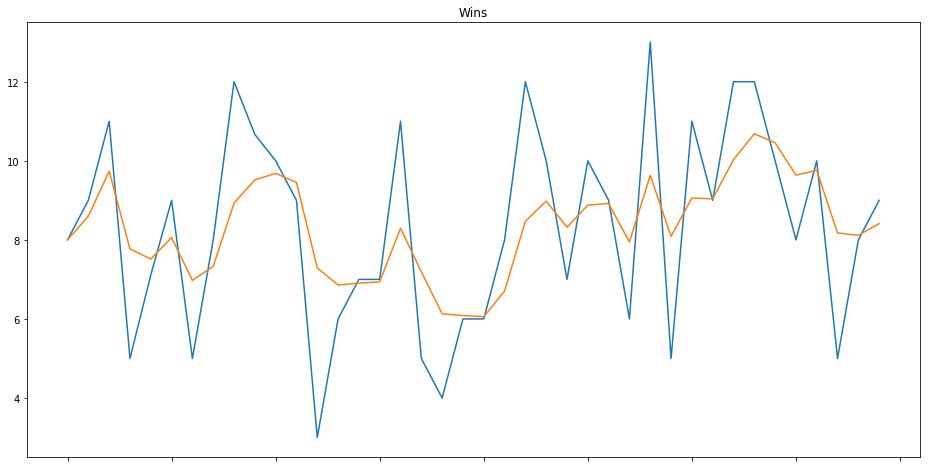

In [271]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title('Wins')
TimeSeries_dict['bal']['adj_win_total'].plot()

TimeSeries_dict['bal']['adj_win_total'].ewm(span=5).mean().plot()

In [241]:
TimeSeries_dict['bal']['Prev_adj_win_tot'] = TimeSeries_dict['bal']['adj_win_total'].shift(1)

In [243]:
TimeSeries_dict['bal']['improved'] = np.where(TimeSeries_dict['bal']['adj_win_total'] > TimeSeries_dict['bal']['adj_win_total'] .shift(1), 1, 0)

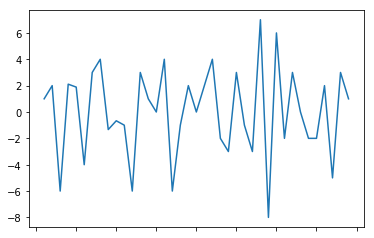

In [273]:
TimeSeries_dict['bal']['adj_win_total'].diff().plot()

In [278]:
print TimeSeries_dict['bal']['adj_win_total'].autocorr(lag=1)
print TimeSeries_dict['bal']['adj_win_total'].autocorr(lag=2)
print TimeSeries_dict['bal']['adj_win_total'].autocorr(lag=3)
print TimeSeries_dict['bal']['adj_win_total'].autocorr(lag=4)
print TimeSeries_dict['bal']['adj_win_total'].autocorr(lag=5)
print TimeSeries_dict['bal']['adj_win_total'].autocorr(lag=6)

0.0874905315062
0.0839807236924
0.0301863769896
-0.317692382616
-0.0756815989276
0.288438915241


In [279]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

/opt/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


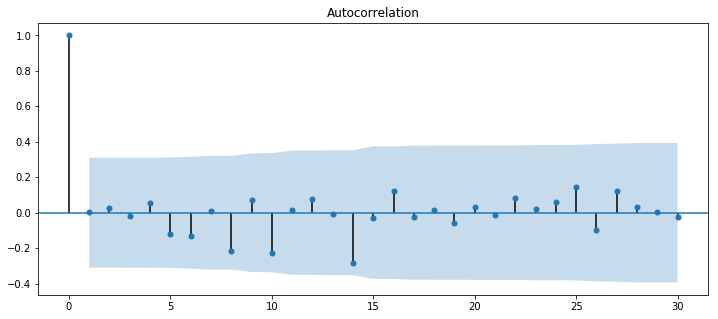

In [285]:
fig, ax = plt.subplots(figsize=(12,5))

plot_acf(TimeSeries_dict['nyj']['adj_win_total'], lags=30, ax=ax)
plt.show()

In [286]:
full_acf_list = []
for team in teams:
    team_acf_list = []
    for i in range(10):
        team_acf_list.append(TimeSeries_dict[team]['adj_win_total'].autocorr(lag=i))
    full_acf_list.append(team_acf_list)

In [288]:
acf_df = pd.DataFrame(full_acf_list, index=[teams]).T
acf_df

,nyj,nep,mia,buf,pit,bal,cle,cin,ind,jax,ten,hou,lac,oak,kcc,den,nyg,phi,was,dal,min,gbp,det,chi,tbb,atl,nos,car,lar,sea,ari,sff
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.006204,0.526992,0.244030,0.473104,0.148489,0.087491,0.205554,0.179993,0.406522,0.422949,0.428652,-0.086089,0.257573,0.495716,0.255528,0.098641,0.026169,0.378447,0.383875,0.359036,0.084899,0.451662,0.082631,0.327040,0.131828,0.091939,0.259353,-0.101869,0.317574,0.419542,0.291318,0.486945
2,0.027039,0.476485,0.310310,0.268244,-0.127097,0.083981,-0.068129,0.203983,0.244085,0.284522,0.044344,-0.095752,0.299953,0.319850,0.122022,0.026613,-0.024079,-0.057581,0.104168,0.339719,-0.053636,0.266283,0.187506,0.220856,0.375225,0.040158,0.213984,0.007179,0.300710,0.259703,0.187631,0.222873
3,-0.019842,0.423809,0.316537,0.107555,0.232929,0.030186,-0.275755,-0.229225,0.296353,0.013006,-0.054619,0.251087,0.238359,0.117772,0.081717,-0.281591,0.109735,-0.138628,0.161279,-0.034867,-0.076734,0.181573,0.156872,-0.029472,0.419471,0.031453,0.073319,0.018498,0.083958,-0.129632,-0.006249,0.214212
4,0.059425,0.194573,-0.038376,-0.081939,0.060861,-0.317692,0.058534,0.021755,0.372108,-0.243933,-0.137979,0.242128,-0.159770,-0.008297,0.061136,-0.323013,0.188427,-0.083635,0.256855,-0.162505,-0.196022,0.078769,0.126531,-0.038722,-0.127016,0.207151,0.049453,-0.081950,0.062578,-0.235601,0.041852,0.145977
5,-0.132848,0.218656,0.173485,-0.126904,-0.136246,-0.075682,0.389522,-0.236133,0.296227,-0.087689,-0.290376,-0.125285,-0.036620,0.117280,-0.046442,-0.253874,-0.034786,-0.356223,0.283363,-0.308498,0.121410,0.138359,-0.111478,0.128027,0.316765,-0.157145,-0.050934,-0.388378,-0.058407,-0.380016,0.154914,0.113221
6,-0.145643,0.234258,0.069091,-0.176604,-0.037959,0.288439,0.052806,0.181288,0.188242,0.135705,-0.363421,-0.510479,-0.481163,0.188955,-0.076282,-0.197421,-0.469112,-0.348790,0.036553,-0.558368,0.071625,-0.088033,-0.029398,-0.093340,-0.000829,0.253549,-0.154721,0.035372,-0.245197,-0.183491,0.335618,0.079916
7,0.014590,0.241300,0.103733,-0.044953,0.095627,0.000451,0.115469,0.027583,0.251507,0.037428,-0.230144,-0.121854,-0.191695,0.150994,-0.115657,0.255518,-0.215258,-0.083381,0.124331,-0.339334,-0.113100,0.061655,-0.135489,-0.078681,-0.145249,0.236960,-0.284463,-0.183875,-0.183795,-0.076050,0.037260,-0.054683
8,-0.259259,0.312758,0.408149,0.037516,-0.231567,0.136406,-0.293545,0.327354,-0.004062,0.363368,0.029495,0.406658,-0.265945,0.354153,-0.159019,0.101235,0.108185,-0.080422,0.286766,-0.335048,-0.221828,0.069923,-0.193657,-0.309735,0.160557,-0.000441,-0.133248,-0.104409,-0.463386,0.076944,-0.081448,-0.011605
9,0.089821,0.389160,0.000970,-0.055841,-0.119894,-0.056205,-0.130101,0.040893,0.125213,-0.161708,0.143469,-0.517428,-0.414407,0.317847,-0.218574,0.161721,-0.182995,-0.150686,0.184139,-0.122446,0.138021,-0.096653,-0.259890,-0.207962,-0.272856,-0.325774,0.039105,0.506011,-0.270232,0.092513,-0.166663,-0.064331


In [292]:
for i in range(10):
    print acf_df.iloc[i].mean(), '     ', acf_df.iloc[i].std()

1.0       7.18953925064e-17
0.254429192455       0.176332101989
0.156598614593       0.156488002258
0.0713458009041       0.179477559915
-0.000260535523421       0.171813916292
-0.0294604296155       0.21419031743
-0.0627760530099       0.243916278904
-0.0263517720068       0.16103252283
0.000963776318715       0.241673251633
-0.0489301155643       0.226823313586


In [293]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

nyj


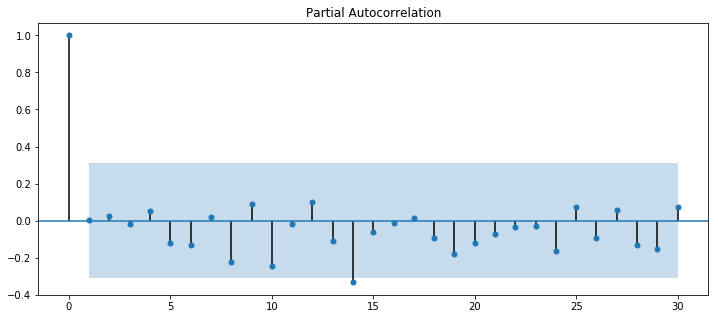

nep


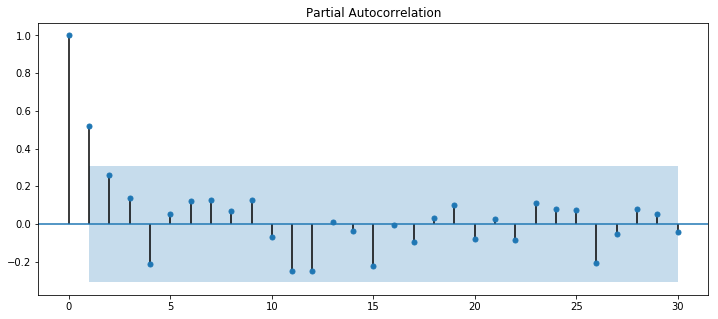

mia


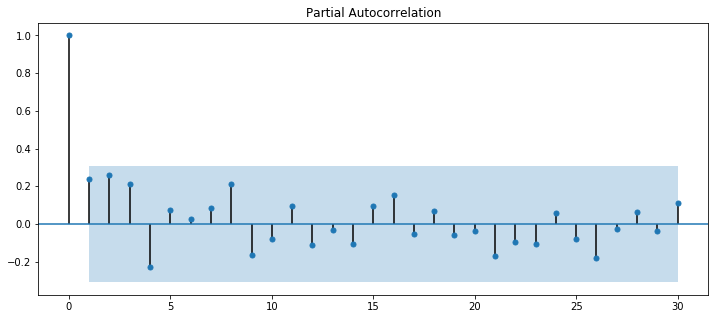

buf


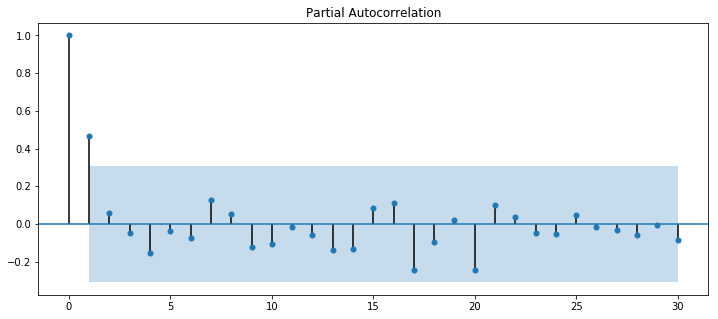

pit


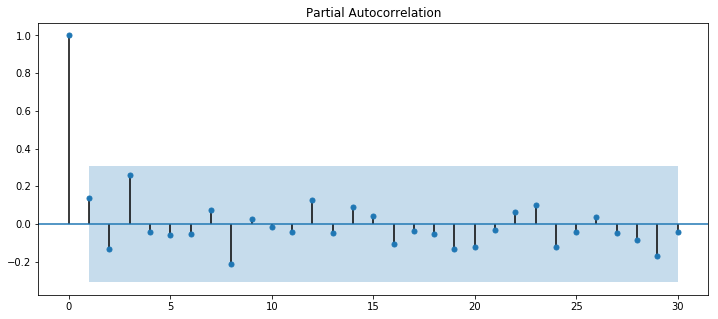

bal


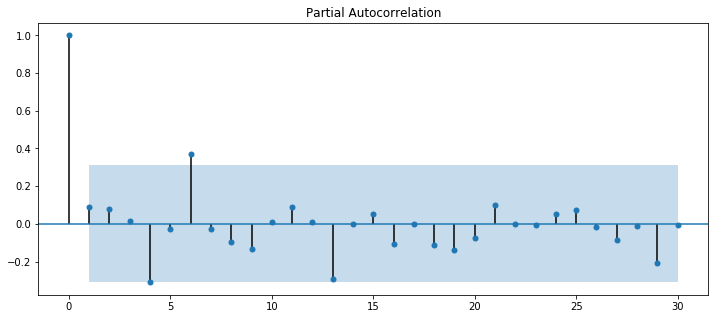

cle


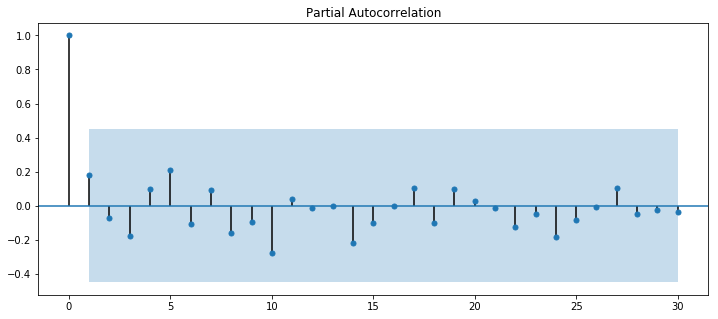

cin


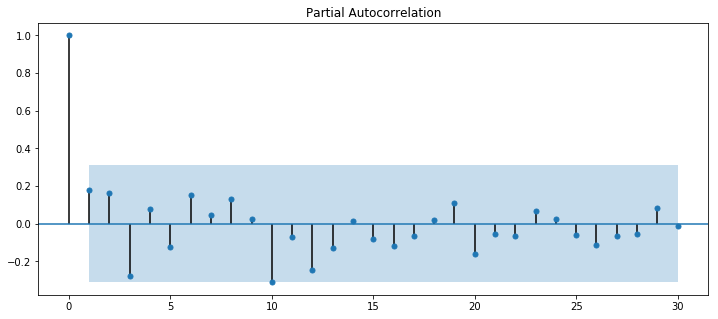

ind


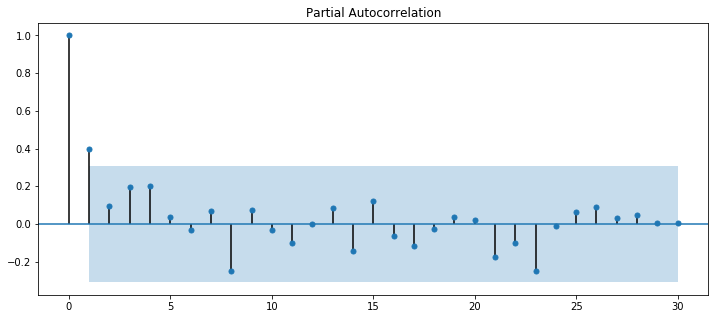

jax


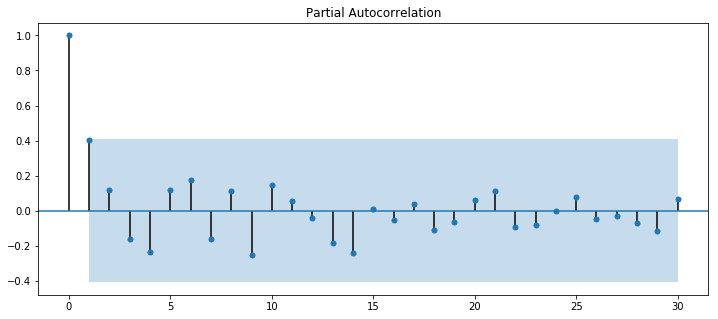

ten


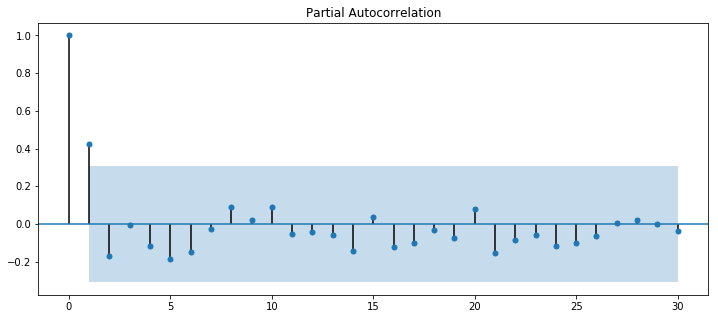

hou


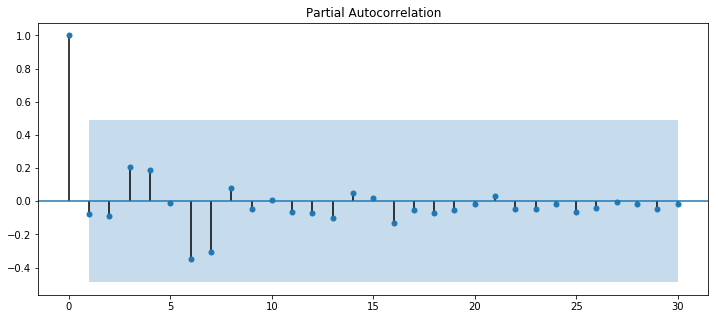

lac


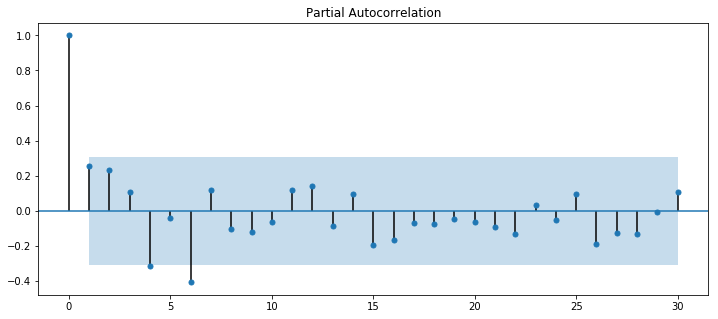

oak


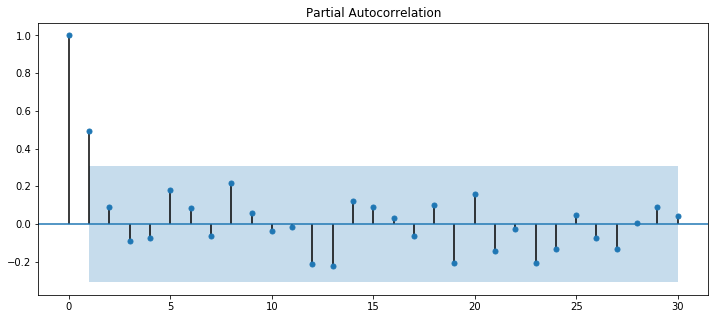

kcc


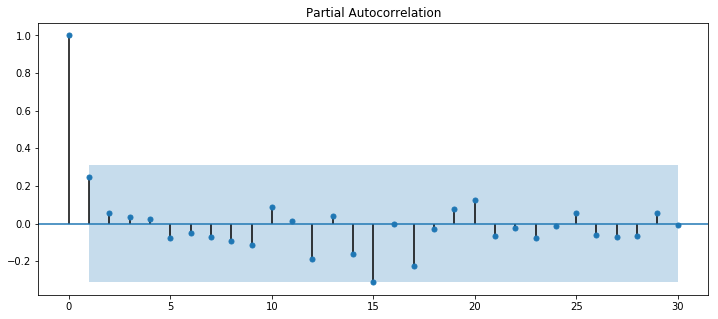

den


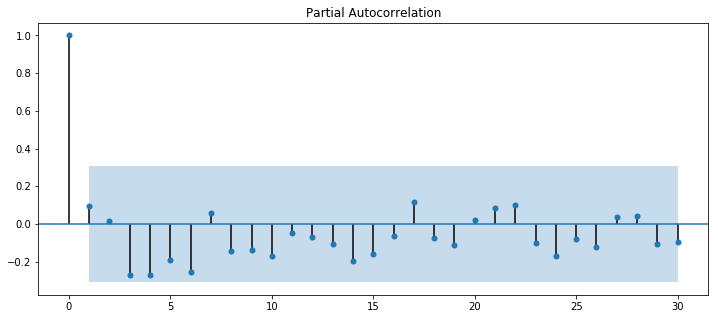

nyg


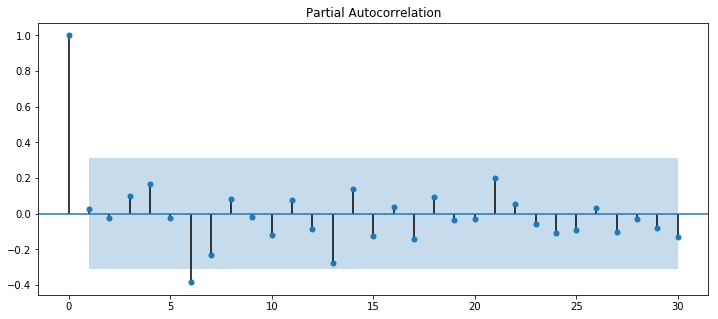

phi


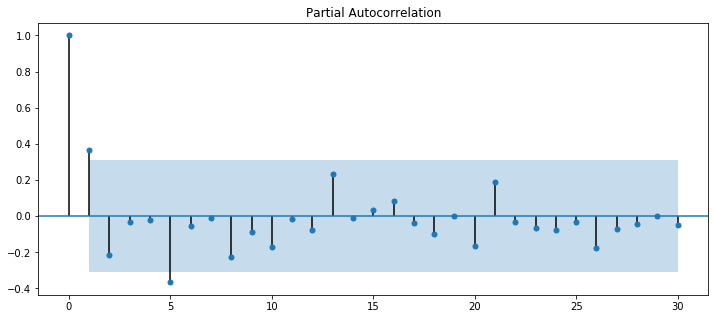

was


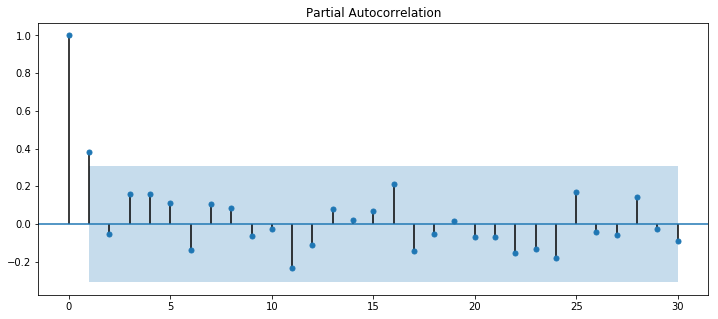

dal


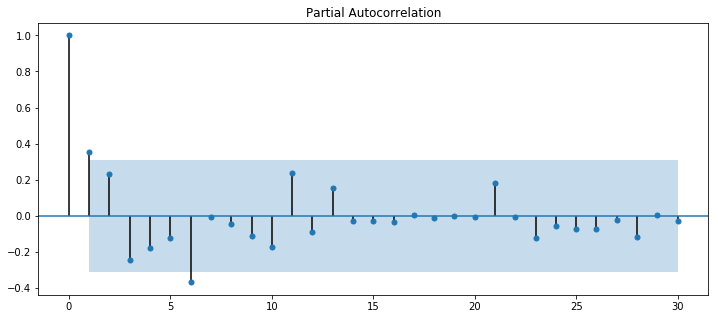

min


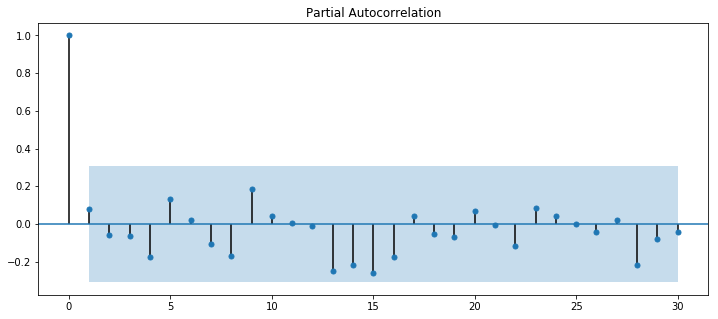

gbp


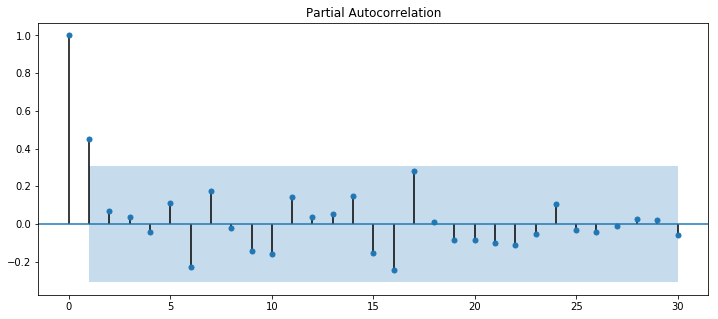

det


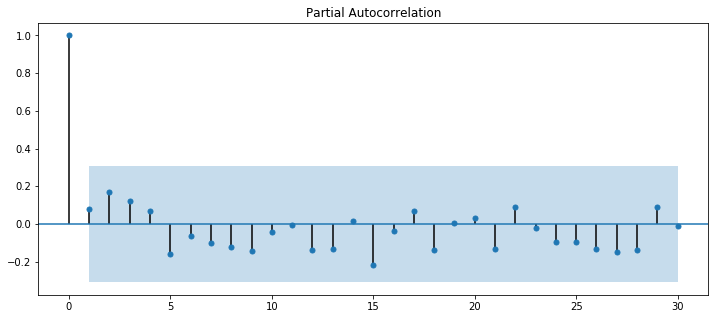

chi


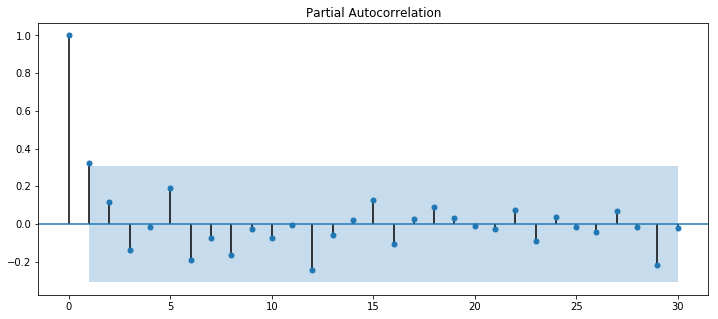

tbb


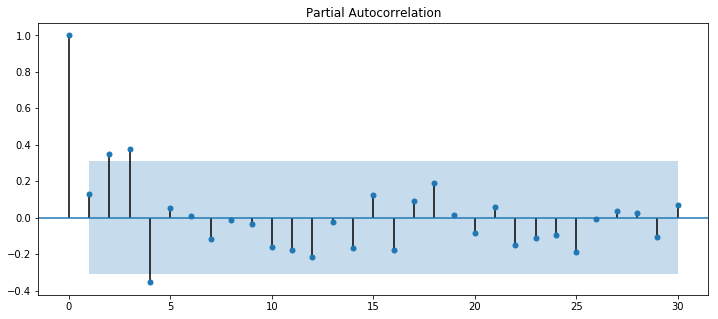

atl


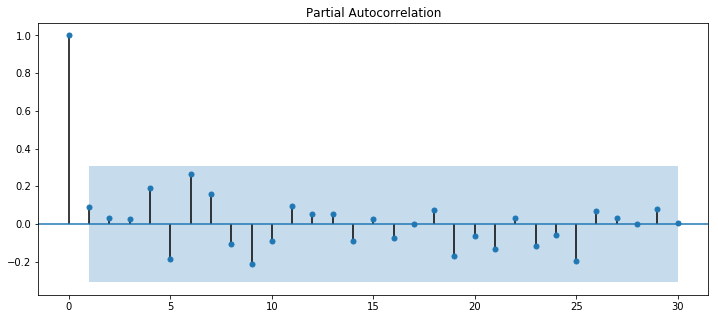

nos


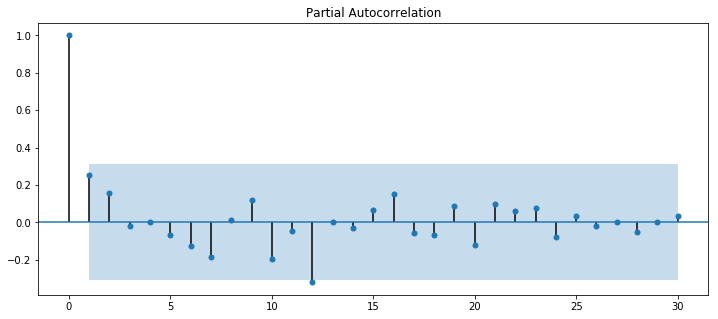

car


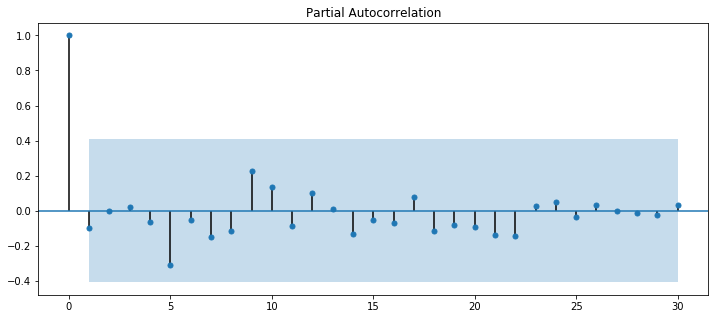

lar


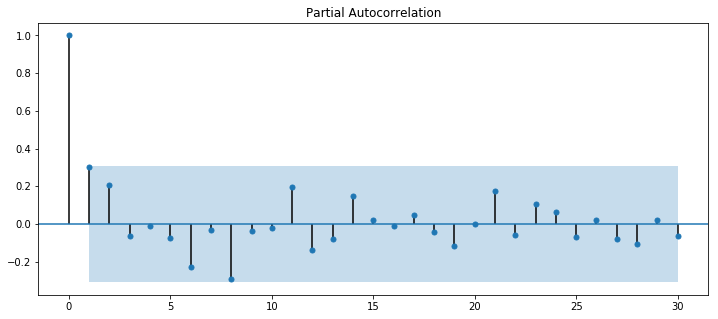

sea


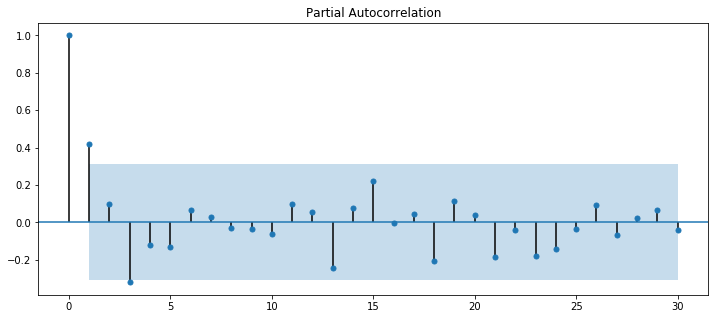

ari


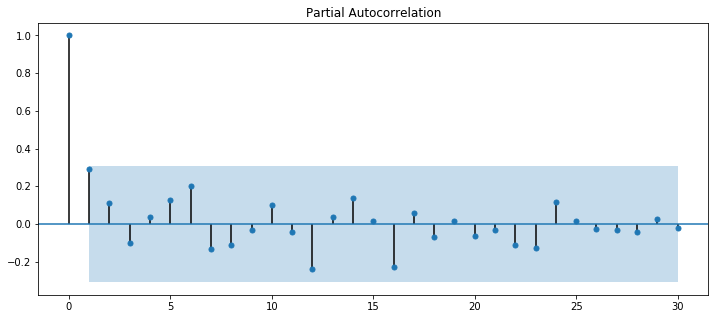

sff


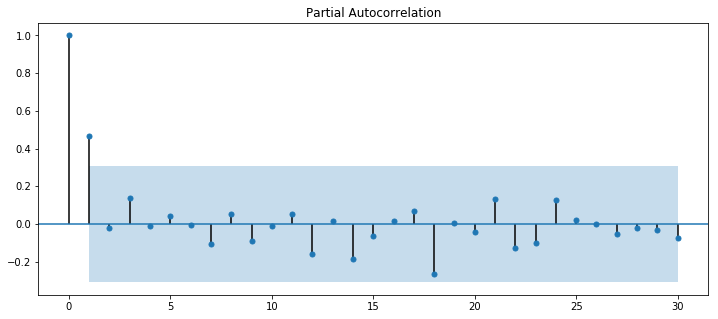

In [300]:
for team in teams:
    print team
    fig, ax = plt.subplots(figsize=(12,5))
    ax.set_title(team)
    plot_pacf(TimeSeries_dict[team]['adj_win_total'], lags=30, ax=ax)
    plt.show()

In [295]:
# This didn't work
full_pacf_list = []
for team in teams:
    team_pacf_list = []
    for i in range(10):
        team_pacf_list.append(TimeSeries_dict[team]['adj_win_total'].autocorr(lag=i))
    full_pacf_list.append(team_pacf_list)

In [296]:
# Neither did this. 
pacf_df = pd.DataFrame(full_pacf_list, index=[teams]).T
pacf_df

,nyj,nep,mia,buf,pit,bal,cle,cin,ind,jax,ten,hou,lac,oak,kcc,den,nyg,phi,was,dal,min,gbp,det,chi,tbb,atl,nos,car,lar,sea,ari,sff
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.006204,0.526992,0.244030,0.473104,0.148489,0.087491,0.205554,0.179993,0.406522,0.422949,0.428652,-0.086089,0.257573,0.495716,0.255528,0.098641,0.026169,0.378447,0.383875,0.359036,0.084899,0.451662,0.082631,0.327040,0.131828,0.091939,0.259353,-0.101869,0.317574,0.419542,0.291318,0.486945
2,0.027039,0.476485,0.310310,0.268244,-0.127097,0.083981,-0.068129,0.203983,0.244085,0.284522,0.044344,-0.095752,0.299953,0.319850,0.122022,0.026613,-0.024079,-0.057581,0.104168,0.339719,-0.053636,0.266283,0.187506,0.220856,0.375225,0.040158,0.213984,0.007179,0.300710,0.259703,0.187631,0.222873
3,-0.019842,0.423809,0.316537,0.107555,0.232929,0.030186,-0.275755,-0.229225,0.296353,0.013006,-0.054619,0.251087,0.238359,0.117772,0.081717,-0.281591,0.109735,-0.138628,0.161279,-0.034867,-0.076734,0.181573,0.156872,-0.029472,0.419471,0.031453,0.073319,0.018498,0.083958,-0.129632,-0.006249,0.214212
4,0.059425,0.194573,-0.038376,-0.081939,0.060861,-0.317692,0.058534,0.021755,0.372108,-0.243933,-0.137979,0.242128,-0.159770,-0.008297,0.061136,-0.323013,0.188427,-0.083635,0.256855,-0.162505,-0.196022,0.078769,0.126531,-0.038722,-0.127016,0.207151,0.049453,-0.081950,0.062578,-0.235601,0.041852,0.145977
5,-0.132848,0.218656,0.173485,-0.126904,-0.136246,-0.075682,0.389522,-0.236133,0.296227,-0.087689,-0.290376,-0.125285,-0.036620,0.117280,-0.046442,-0.253874,-0.034786,-0.356223,0.283363,-0.308498,0.121410,0.138359,-0.111478,0.128027,0.316765,-0.157145,-0.050934,-0.388378,-0.058407,-0.380016,0.154914,0.113221
6,-0.145643,0.234258,0.069091,-0.176604,-0.037959,0.288439,0.052806,0.181288,0.188242,0.135705,-0.363421,-0.510479,-0.481163,0.188955,-0.076282,-0.197421,-0.469112,-0.348790,0.036553,-0.558368,0.071625,-0.088033,-0.029398,-0.093340,-0.000829,0.253549,-0.154721,0.035372,-0.245197,-0.183491,0.335618,0.079916
7,0.014590,0.241300,0.103733,-0.044953,0.095627,0.000451,0.115469,0.027583,0.251507,0.037428,-0.230144,-0.121854,-0.191695,0.150994,-0.115657,0.255518,-0.215258,-0.083381,0.124331,-0.339334,-0.113100,0.061655,-0.135489,-0.078681,-0.145249,0.236960,-0.284463,-0.183875,-0.183795,-0.076050,0.037260,-0.054683
8,-0.259259,0.312758,0.408149,0.037516,-0.231567,0.136406,-0.293545,0.327354,-0.004062,0.363368,0.029495,0.406658,-0.265945,0.354153,-0.159019,0.101235,0.108185,-0.080422,0.286766,-0.335048,-0.221828,0.069923,-0.193657,-0.309735,0.160557,-0.000441,-0.133248,-0.104409,-0.463386,0.076944,-0.081448,-0.011605
9,0.089821,0.389160,0.000970,-0.055841,-0.119894,-0.056205,-0.130101,0.040893,0.125213,-0.161708,0.143469,-0.517428,-0.414407,0.317847,-0.218574,0.161721,-0.182995,-0.150686,0.184139,-0.122446,0.138021,-0.096653,-0.259890,-0.207962,-0.272856,-0.325774,0.039105,0.506011,-0.270232,0.092513,-0.166663,-0.064331


In [297]:
# Or this
for i in range(10):
    print pacf_df.iloc[i].mean(), '     ', pacf_df.iloc[i].std()

1.0       7.18953925064e-17
0.254429192455       0.176332101989
0.156598614593       0.156488002258
0.0713458009041       0.179477559915
-0.000260535523421       0.171813916292
-0.0294604296155       0.21419031743
-0.0627760530099       0.243916278904
-0.0263517720068       0.16103252283
0.000963776318715       0.241673251633
-0.0489301155643       0.226823313586


In [244]:
TimeSeries_dict['bal']

,orig_draft_spot,team_first_pick,adj_win_total,Prev_adj_win_tot,improved
1978,12.0,12.0,8.000000,NaN,0
1979,18.0,20.0,9.000000,8.000000,1
1980,21.0,27.0,11.000000,9.000000,1
1981,4.0,22.0,5.000000,11.000000,0
1982,13.0,3.0,7.111111,5.000000,1
1983,18.0,48.0,9.000000,7.111111,1
1984,7.0,18.0,5.000000,9.000000,0
1985,15.0,48.0,8.000000,5.000000,1
1986,25.0,48.0,12.000000,8.000000,1
1987,24.0,5.0,10.666667,12.000000,0


In [ ]:
# bal_train = TimeSeries_dict['bal'].loc[:'2001']
# bal_test = TimeSeries_dict['bal'].loc['2002':]

In [303]:
# from statsmodels.tsa.api import SARIMAX

# # arima = ARIMA(endog=TimeSeries_dict['bal']['win_total'], order=(1,1,1), exog=TimeSeries_dict['bal']['orig_draft_spot']).fit()

# import statsmodels.formula.api as smf
# import statsmodels.tsa.api as smt
# import statsmodels.api as sm
# import seaborn as sns

# # From https://tomaugspurger.github.io/modern-7-timeseries
# def tsplot(y, lags=None, figsize=(10, 8)):
#     fig = plt.figure(figsize=figsize)
#     layout = (2, 2)
#     ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
#     acf_ax = plt.subplot2grid(layout, (1, 0))
#     pacf_ax = plt.subplot2grid(layout, (1, 1))

#     y.plot(ax=ts_ax)
#     smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
#     smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
#     [ax.set_xlim(1.5) for ax in [acf_ax, pacf_ax]]
#     sns.despine()
#     plt.tight_layout()
#     return ts_ax, acf_ax, pacf_ax

# mod = SARIMAX(TimeSeries_dict['bal']['adj_win_total'], exog=TimeSeries_dict['bal']['orig_draft_spot'], order=(1, 1, 1))
# res = mod.fit()
# tsplot(res.resid[2:], lags=24);

# predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
# print predictions_ARIMA_diff.head()

In [320]:
from statsmodels.tsa.arima_model import ARIMA

In [327]:
arima = ARIMA(endog=TimeSeries_dict['bal']['adj_win_total'], order=(2,1,2))

In [330]:
results_ARIMA = arima.fit() 

In [335]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

1979    0.035802
1980   -0.416622
1981   -1.422321
1982    3.003035
1983    0.754528
dtype: float64


In [336]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()

1979    0.035802
1980   -0.380820
1981   -1.803141
1982    1.199895
1983    1.954423
dtype: float64


In [339]:
results_ARIMA.summary()

/opt/lib/python2.7/site-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/opt/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.adj_win_total   No. Observations:                   39
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -92.661
Method:                       css-mle   S.D. of innovations              2.469
Date:                Mon, 19 Feb 2018   AIC                            197.321
Time:                        12:21:33   BIC                            207.302
Sample:                    01-01-1979   HQIC                           200.902
                         - 01-01-2017                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0358      0.038      0.947      0.350      -0.038       0.110
ar.L1.D.adj_win_total    -0.8871        nan        nan        nan         nan         nan
ar.L2.D.adj_win_total     0.1128        nan        nan        nan         nan         nan
ma.L1.D.adj_win_total    -0.0015      0.077     -0.019      0.985      -0.152       0.149
ma.L2.D.adj_win_total    -0.9985      0.077    -13.044      0.000      -1.149      -0.848
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0000           +0.0000j            1.0000            0.5000
AR.2            8.8635           +0.0000j            8.8635            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.0015           +0.0000j            1.0015            0.5000
-----------------------------------------------------------------------------
"""